In [1]:
import sys
#!{sys.executable} -m pip install pymongo
#!{sys.executable} -m pip install pyyaml
#!{sys.executable} -m pip install matplotlib
#!{sys.executable} -m pip install scipy
#!{sys.executable} -m pip install pandas
#!{sys.executable} -m pip install isoweek

In [2]:

import os
print(os.getcwd())
# Get Mongo database
from yaml import load
from pymongo import MongoClient
from getsecret import getsecret

client = MongoClient(getsecret("EXT_URI"))
db = client[getsecret("MOBILE_NAME")]
ext_client = MongoClient(getsecret("EXT_URI"))
ext_db = ext_client[getsecret("DB_NAME")]
# Get all synced accounts and their respective users.
import urllib.request as req
import json
accounts = json.loads(req.urlopen("http://localhost:5000/synced_emails").read().decode("utf-8"))
print(accounts)
# counter for figures
counter = 0
browser_freq = 0
browser_infreq = 0


### CONSTANTS ###
ANDROID_INTENSITY = "android_intensity"
ANDROID = "android"
BROWSER = "browser" # habitlab goal, i.e. facebook/spend_less_time or custom/spend_less_time_developers.slashdot.org
BROWSER_DOMAIN = "browser_domain"
SHARED = "shared"
PACKAGES = "packages"
OTHER_FREQUENCY = "other_frequency"
TIME = "time"
from datetime import date, datetime
SPEND_LESS_TIME_LENGTH = len("custom/spend_less_time_")
INTENSITY = "intensity"
TOTAL_TIME = "total_time"
ANDROID = "android"
BROWSER = "browser"
HASH = "email_hash"
GOALS = "goals"
FREQ_GOALS = "freq_goals"
INFREQ_GOALS = "infreq_goals"
OTHER_TIME = "other_time"
GOAL_TIME = "goal_time"
FREQ_TIME = "freq_time"
INFREQ_TIME = "infreq_time"
AVG_FREQ_TIME = "avg_freq_time"
AVG_INFREQ_TIME = "avg_infreq_time"
BROWSER_INTENSITY = "browser_intensity"
NUM_BROWSER_GOALS = "num_browser_goals"
TARGET_TIME = "target_time"
# Associate users with domain name which will function as our key.
# Top-level-domain-names that are not pertinent to the application.
TLDs = ['www', 'aaa', 'abb', 'abc', 'ac', 'aco', 'ad', 'ads', 'ae', 'aeg', 'af', 'afl', 'ag', 'ai', 'aig', 'al', 
        'am', 'anz', 'ao', 'aol', 'app', 'aq', 'ar', 'art', 'as', 'at', 'au', 'aw', 'aws', 'ax', 'axa', 'az', 'ba', 
        'bar', 'bb', 'bbc', 'bbt', 'bcg', 'bcn', 'bd', 'be', 'bet', 'bf', 'bg', 'bh', 'bi', 'bid', 'bio', 'biz', 'bj', 
        'bm', 'bms', 'bmw', 'bn', 'bnl', 'bo', 'bom', 'boo', 'bot', 'box', 'br', 'bs', 'bt', 'buy', 'bv', 'bw', 'by', 
        'bz', 'bzh', 'ca', 'cab', 'cal', 'cam', 'car', 'cat', 'cba', 'cbn', 'cbs', 'cc', 'cd', 'ceb', 'ceo', 'cf', 
        'cfa', 'cfd', 'cg', 'ch', 'ci', 'ck', 'cl', 'cm', 'cn', 'co', 'com', 'cr', 'crs', 'csc', 'cu', 'cv', 'cw', 
        'cx', 'cy', 'cz', 'dad', 'day', 'dds', 'de', 'dev', 'dhl', 'diy', 'dj', 'dk', 'dm', 'dnp', 'do', 'dog', 'dot',
        'dtv', 'dvr', 'dz', 'eat', 'ec', 'eco', 'edu', 'ee', 'eg', 'er', 'es', 'esq', 'et', 'eu', 'eus', 'fan', 'fi', 
        'fit', 'fj', 'fk', 'fly', 'fm', 'fo', 'foo', 'fox', 'fr', 'frl', 'ftr', 'fun', 'fyi', 'ga', 'gal', 'gap', 'gb',
        'gd', 'gdn', 'ge', 'gea', 'gf', 'gg', 'gh', 'gi', 'gl', 'gle', 'gm', 'gmo', 'gmx', 'gn', 'goo', 'gop', 'got', 
        'gov', 'gp', 'gq', 'gr', 'gs', 'gt', 'gu', 'gw', 'gy', 'hbo', 'hiv', 'hk', 'hkt', 'hm', 'hn', 'hot', 'how', 
        'hr', 'ht', 'hu', 'ibm', 'ice', 'icu', 'id', 'ie', 'ifm', 'il', 'im', 'in', 'inc', 'ing', 'ink', 'int', 'io',
        'iq', 'ir', 'is', 'ist', 'it', 'itv', 'jcb', 'jcp', 'je', 'jio', 'jlc', 'jll', 'jm', 'jmp', 'jnj', 'jo', 'jot',
        'joy', 'jp', 'ke', 'kfh', 'kg', 'kh', 'ki', 'kia', 'kim', 'km', 'kn', 'kp', 'kpn', 'kr', 'krd', 'kw', 'ky', 
        'kz', 'la', 'lat', 'law', 'lb', 'lc', 'lds', 'li', 'lk', 'llc', 'lol', 'lpl', 'lr', 'ls', 'lt', 'ltd', 'lu', 
        'lv', 'ly', 'ma', 'man', 'map', 'mba', 'mc', 'md', 'me', 'med', 'men', 'mg', 'mh', 'mil', 'mit', 'mk', 'ml', 
        'mlb', 'mls', 'mm', 'mma', 'mn', 'mo', 'moe', 'moi', 'mom', 'mov', 'mp', 'mq', 'mr', 'ms', 'msd', 'mt', 'mtn',
        'mtr', 'mu', 'mv', 'mw', 'mx', 'my', 'mz', 'na', 'nab', 'nba', 'nc', 'ne', 'nec', 'net', 'new', 'nf', 'nfl', 
        'ng', 'ngo', 'nhk', 'ni', 'nl', 'no', 'now', 'np', 'nr', 'nra', 'nrw', 'ntt', 'nu', 'nyc', 'nz', 'obi', 'off',
        'om', 'one', 'ong', 'onl', 'ooo', 'org', 'ott', 'ovh', 'pa', 'pay', 'pe', 'pet', 'pf', 'pg', 'ph', 'phd', 
        'pid', 'pin', 'pk', 'pl', 'pm', 'pn', 'pnc', 'pr', 'pro', 'pru', 'ps', 'pt', 'pub', 'pw', 'pwc', 'py', 'qa',
        'qvc', 're', 'red', 'ren', 'ril', 'rio', 'rip', 'ro', 'rs', 'ru', 'run', 'rw', 'rwe', 'sa', 'sap', 'sas', 'sb',
        'sbi', 'sbs', 'sc', 'sca', 'scb', 'sd', 'se', 'ses', 'sew', 'sex', 'sfr', 'sg', 'sh', 'si', 'sj', 'sk', 'ski',
        'sky', 'sl', 'sm', 'sn', 'so', 'soy', 'sr', 'srl', 'srt', 'st', 'stc', 'su', 'sv', 'sx', 'sy', 'sz', 'tab', 
        'tax', 'tc', 'tci', 'td', 'tdk', 'tel', 'tf', 'tg', 'th', 'thd', 'tj', 'tjx', 'tk', 'tl', 'tm', 'tn', 'to', 
        'top', 'tr', 'trv', 'tt', 'tui', 'tv', 'tvs', 'tw', 'tz', 'ua', 'ubs', 'ug', 'uk', 'uno', 'uol', 'ups', 'us', 
        'uy', 'uz', 'va', 'vc', 've', 'vet', 'vg', 'vi', 'vig', 'vin', 'vip', 'vn', 'vu', 'wed', 'wf', 'win', 'wme', 
        'wow', 'ws', 'wtc', 'wtf', 'xin', 'xxx', 'xyz', 'ye', 'you', 'yt', 'yun', 'za', 'zip', 'zm', 'zw']

/Users/drewgregory/JupyterNotebooks/gezas work/habitlab-data-analysis
[{'_id': '0744f7e9f4323685b86a1522b101550c9415ba2488d7e77649b3f21f2adc0d3f', 'android': ['9cb8c59eabbb60ad6447345c'], 'browser': []}, {'_id': 'e8493f5e2cc89f1ca9328c889763125a1a117bd0e8f4e428100450f9da987006', 'android': ['b219926d16e6e46fa426cafd'], 'browser': []}, {'_id': '739e11589479d8e6b88aec1b86ec8c4a023691db6c9d0aab05a4b3a508b0e2db', 'android': ['U1532437453047928'], 'browser': []}, {'_id': 'c3e36aee683e96002d1441743cf8580ebe5e4916e76c049a97c89422b69477fd', 'android': ['010cf6179f52b3d62184ee17'], 'browser': []}, {'_id': 'd0ed3649a5a7e59e6314bcf67879e6ede0376a2a85736382fdf157a0ae2efd33', 'android': ['0b0d1da5c036cb9637aff5d5'], 'browser': []}, {'_id': 'c09060490d493d24c53f6741c911bd4b55c1a57fa157e89c24c8ee566dbec273', 'android': ['f6c5e87bbe828ffc4278d4b7'], 'browser': []}, {'_id': '1a59ec7d9cd85320e025638f99736d66cc997dbe3ee1755d270b2421feefd904', 'android': ['38a4b3e06ead18a13442f5a7'], 'browser': []}, {'_id

In [3]:

def get_name(name, device):
    """
    @param name: goal name (package name for Android)
    @param device: "android" or "browser" or "browser_domain"
    @return name of goal with subdomains removed and goal annotation removed (i.e. spend_less_time)
    """
    if device == ANDROID  and name =="com.google.android.gm" or device == BROWSER and "gmail" in name:
        return "gmail"
    name = name.lower()
    if "custom" in name and device == BROWSER:
        # strip off the "custom/spend_less_time_"
        name = name[SPEND_LESS_TIME_LENGTH:]
    elif device == BROWSER:
        return name.split('/spend')[0]
    # Now we have to get juicy part of domain.
    subs = list(filter(lambda x: x != "android" and x != "google" and x != "apps" and x not in TLDs, name.split('.')))
    if device == ANDROID: 
        if len(subs) > 0:
            return subs[0]
        return name
    else:
        if len(subs) > 0:
            return subs[len(subs) - 1]    
        
def organize_stats(shared_goals, stats, device, counts, user_id):
    """
    Organizes that stats object into shared_goals for device.
    @param shared_goals: dictionary
    @param stats:  stats object returned from freq_stats
    @param device: ANDROID or BROWSER
    """
    for iso in stats:
        for freq in stats[iso]:
            for goal in stats[iso][freq]:
                name = get_name(goal, device)
                if name not in shared_goals:
                    shared_goals[name] = {ANDROID: {PACKAGES:[]} , BROWSER: {PACKAGES:[]} }
                if goal not in shared_goals[name][device][PACKAGES]:
                    shared_goals[name][device][PACKAGES].append(goal)
                    shared_goals[name][device][goal] = {}
                if iso not in shared_goals[name][device][goal]:
                    shared_goals[name][device][goal][iso] = freq
                    if device == BROWSER:
                        counts[freq] += 1
                # Before I submitted the update, some apps under the same name wouldn't have the same freq setting.
                elif shared_goals[name][device][goal][iso] != freq:
                    shared_goals[name][device][goal][iso] = "both"
                    counts["both"] += 1
                if len(shared_goals[name][ANDROID][PACKAGES]) > 0 and len(shared_goals[name][BROWSER][PACKAGES]) > 0:
                    shared_goals[SHARED].add(name)


In [4]:
# Analyze conservation across devices
shared_data = {}
counts = {"freq" : 0, "infreq": 0,  'both' :0}

num_shared_goals = 0
for account in accounts:
    shared_goals = {SHARED: set([])}
    if len(account[ANDROID]) > 0 and len(account[BROWSER]) > 0: # It's possible they have overlapping goals.
        for user in account[ANDROID]:
            stats = json.loads(req.urlopen("http://localhost:5000/freq_stats_for_user?id="+user).read().decode("utf-8"))
            organize_stats(shared_goals, stats, ANDROID, counts, user)
        for user in account[BROWSER]:
            stats = json.loads(req.urlopen("http://localhost:5000/freq_stats_for_user_browser?id="+user).read().decode("utf-8"))
            organize_stats(shared_goals, stats, BROWSER, counts, user)
        shared_data[account['_id']] = shared_goals
        num_shared_goals += len(shared_goals[SHARED])

In [5]:
print(str(counts))
print(len([acc for acc in shared_data]))


{'freq': 1267, 'infreq': 1127, 'both': 298}
184


In [6]:
# count how many freq vs. in freq things there are in shared_data
device_freq = {"android": {"freq" : 0, "infreq": 0, "both": 0},  "browser": {"freq":  0, "infreq": 0, "both": 0}}
for account in shared_data:
    for goal in shared_data[account]:
        if goal != "shared": 
            for device in shared_data[account][goal]:
                for package in shared_data[account][goal][device]:
                    if package != "packages":
                        for week in shared_data[account][goal][device][package]:
                            device_freq[device][shared_data[account][goal][device][package][week]] += 1
print(device_freq)
#Hmmmm... android looks okay, but big imbalance between freq/infreq browser

{'android': {'freq': 1202, 'infreq': 1049, 'both': 87}, 'browser': {'freq': 1114, 'infreq': 1119, 'both': 161}}


In [7]:
# Let's see what browser names there are
browser_names = set([])
for account in shared_data:
    for goal in shared_data[account]:
        if BROWSER in shared_data[account][goal]:
            if len(shared_data[account][goal][BROWSER]["packages"]) > 1:
                browser_names.add(goal + " " + str(shared_data[account][goal][BROWSER]))

In [8]:
print(browser_names)

{"twitter {'packages': ['twitter/spend_less_time', 'custom/spend_less_time_tweetdeck.twitter.com'], 'twitter/spend_less_time': {'35': 'freq', '36': 'freq', '37': 'infreq', '38': 'infreq'}, 'custom/spend_less_time_tweetdeck.twitter.com': {'35': 'infreq', '36': 'infreq', '37': 'freq', '38': 'infreq'}}", "instagram {'packages': ['custom/spend_less_time_instagram.com', 'custom/spend_less_time_www.instagram.com'], 'custom/spend_less_time_instagram.com': {'34': 'infreq', '35': 'infreq', '36': 'freq', '37': 'infreq', '38': 'freq'}, 'custom/spend_less_time_www.instagram.com': {'35': 'infreq', '36': 'infreq', '37': 'infreq', '38': 'freq'}}", "nytimes {'packages': ['custom/spend_less_time_nytimes.com', 'custom/spend_less_time_www.nytimes.com'], 'custom/spend_less_time_nytimes.com': {'33': 'freq', '34': 'infreq', '35': 'freq', '36': 'infreq', '37': 'freq', '38': 'freq'}, 'custom/spend_less_time_www.nytimes.com': {'33': 'freq', '34': 'freq', '35': 'infreq', '36': 'infreq', '37': 'infreq', '38': 'f

In [9]:
def get_iso_for_week(iso_week, account, shared_data, goal):
    """
    Gets browser and android frequency settings for a given goal, week, and account.
    :account email hash
    :goal get_name return of package
    :shared_data {email_hash: 'shared': {set of shared goals}, goal: {device: {'packages': [], package: {isoWeek: 'freq' or 'infreq'}}}}
    :return (browser frequency -> "freq" or "infreq", android frequency -> "freq" or "infreq"); if no freq found None
    """
    # First, get browser package
    if goal not in shared_data[account]:
        return None
        
    browser_goal_packages = shared_data[account][goal][BROWSER][PACKAGES]
    browser_freq = None
    for package in browser_goal_packages:
        if not browser_freq:
            for iso in shared_data[account][goal][BROWSER][package]:
                if str(iso) == str(iso_week):
                    browser_freq = shared_data[account][goal][BROWSER][package][iso]
                    break
    if not browser_freq:
        return None
    # Next get Android packages
    android_goal_packages = shared_data[account][goal][ANDROID][PACKAGES]
    android_freq = None
    for package in android_goal_packages:
        if not android_freq:
            for iso in shared_data[account][goal][ANDROID][package]:
                if str(iso) == str(iso_week):
                    android_freq = shared_data[account][goal][ANDROID][package][iso]
                    break
    if not android_freq:
        return None
    return (browser_freq, android_freq)


In [10]:
from isoweek import Week
from datetime import date, datetime
import moment
import math
from time_utils import epoch_to_date
# Now, the goal is to get the daily time spent on these special domains.
# Goal: [{"goal": "", "device": "android", frequent": true, "email_hash": "", "other_device_freq": true}]\
device_freq = {"android": {"freq" : 0, "infreq": 0, "both": 0},  "browser": {"freq":  0, "infreq": 0, "both": 0}}
day_spent_shared_domain_stats = []
for account in shared_data:
    print(account)
    # The browser data is already there, so let's fetch it.
    domain_freq_day_time = {BROWSER: {}, ANDROID: {}}
    for user in db['email_to_user'].find({'_id': account})[0][BROWSER]:
        for day_stat in ext_db[user+ "_synced:seconds_on_domain_per_day"].find():
            goal = get_name(day_stat['key'], BROWSER_DOMAIN)
            # print(shared_data[account][SHARED])
            if goal in shared_data[account][SHARED]: # It can be a data point.
                # The key1 serves as a day. However, if we are going to compare same day stuffs for android.
                # We need to instead build day string from moment
                day = epoch_to_date(int(day_stat['key2']))
                # weirdly enough, datetime timestamps are seconds, not ms.
                isoWeek = str(datetime.fromtimestamp(moment.date(day).epoch()+ 8*60*60).isocalendar()[1])
                # Now, we need to hope that all the packages the user is using under that goal name is in 
                # same freq/infreq setting.
                freq_settings = get_iso_for_week(isoWeek, account, shared_data, goal)
                if freq_settings:
                    print(day)
                    print(moment.date(day).epoch())
                    print(str(datetime.fromtimestamp(moment.date(day).epoch()+ 8*60*60)))
                    (browser_freq, android_freq) = freq_settings
                    # YES WE HAVE ALL THE DATAS FOR A POINT
                    if goal not in domain_freq_day_time[BROWSER]:
                        domain_freq_day_time[BROWSER][goal] = {}
                    if browser_freq not in domain_freq_day_time[BROWSER][goal]:
                        domain_freq_day_time[BROWSER][goal][browser_freq] = {}
                    if day not in domain_freq_day_time[BROWSER][goal][browser_freq]:
                        domain_freq_day_time[BROWSER][goal][browser_freq][day] = {}
                    day_obj = domain_freq_day_time[BROWSER][goal][browser_freq][day]
                    day_obj[OTHER_FREQUENCY] = android_freq
                    #if OTHER_FREQUENCY not in day_obj:
                    #    day_obj[OTHER_FREQUENCY] = android_freq
                    if TIME not in day_obj or math.log(day_stat['val']) > day_obj[TIME]:
                        # we want the final update of time spent for that day on that domain.
                        day_obj[TIME] = (math.log(day_stat['val']))
   
    # PHEW WE GOT THRU IT ALL. Now let's add the valid data points to the array!

    for device in domain_freq_day_time:
        for goal in domain_freq_day_time[device]:
            for freq in domain_freq_day_time[device][goal]:
                for day in domain_freq_day_time[device][goal][freq]:
                    day_obj = domain_freq_day_time[device][goal][freq][day]
                    device_freq[device][freq] += 1
                    obj = {"goal": goal, "device": device, "frequent": freq, "email_hash": account,
                          "other_device_freq": day_obj[OTHER_FREQUENCY], "duration":day_obj[TIME], "day": day}
                    day_spent_shared_domain_stats.append(obj)

ce2998348d6b1204814e71969fb031253cbb828f2e04d4b42c7c9c33735255c2
2b4560fa696cfd842dc1cbcd24b12d1674b7cf267f4c1920971080ef87dc2311
61072994c218f33ac8ffa0be0c6525f4e8a0ca08d84957e53f44588ab77d4320
f653fba473726066017d092faf775b60a39bd4616590332eb815f0bb74fa22f2
731a2149397ee2138058994a2da77a9a502f52c1453cd5f181ff93297c4e4b23
6810eacf7edd74cb2f55bcac37c009d8eae821398c0aa41b4d8742f983fcec57
8b236f84f8b6e9b2fbf33bf242b7d7b6714c1d65dacbd2b7921b5672b10dbac6
8b24da789d3a62d3ec752b2f6c9130c8b40e9a1192334a21a38d6fb55ac374ef
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-22
1534896

2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 0

2018-08-13
1534118400
2018-08-13 04:00:00
2018-08-13
1534118400
2018-08-13 04:00:00
2018-08-13
1534118400
2018-08-13 04:00:00
2018-08-13
1534118400
2018-08-13 04:00:00
2018-08-13
1534118400
2018-08-13 04:00:00
2018-08-13
1534118400
2018-08-13 04:00:00
2018-08-13
1534118400
2018-08-13 04:00:00
2018-08-13
1534118400
2018-08-13 04:00:00
2018-08-13
1534118400
2018-08-13 04:00:00
2018-08-13
1534118400
2018-08-13 04:00:00
2018-08-13
1534118400
2018-08-13 04:00:00
2018-08-13
1534118400
2018-08-13 04:00:00
2018-08-13
1534118400
2018-08-13 04:00:00
2018-08-13
1534118400
2018-08-13 04:00:00
2018-08-13
1534118400
2018-08-13 04:00:00
2018-08-13
1534118400
2018-08-13 04:00:00
2018-08-13
1534118400
2018-08-13 04:00:00
2018-08-13
1534118400
2018-08-13 04:00:00
2018-08-13
1534118400
2018-08-13 04:00:00
2018-08-13
1534118400
2018-08-13 04:00:00
2018-08-13
1534118400
2018-08-13 04:00:00
2018-08-13
1534118400
2018-08-13 04:00:00
2018-08-13
1534118400
2018-08-13 04:00:00
2018-08-13
1534118400
2018-08-13 0

1534204800
2018-08-14 04:00:00
2018-08-14
1534204800
2018-08-14 04:00:00
2018-08-14
1534204800
2018-08-14 04:00:00
2018-08-14
1534204800
2018-08-14 04:00:00
2018-08-14
1534204800
2018-08-14 04:00:00
2018-08-14
1534204800
2018-08-14 04:00:00
2018-08-14
1534204800
2018-08-14 04:00:00
2018-08-14
1534204800
2018-08-14 04:00:00
2018-08-14
1534204800
2018-08-14 04:00:00
2018-08-14
1534204800
2018-08-14 04:00:00
2018-08-14
1534204800
2018-08-14 04:00:00
2018-08-14
1534204800
2018-08-14 04:00:00
2018-08-14
1534204800
2018-08-14 04:00:00
2018-08-14
1534204800
2018-08-14 04:00:00
2018-08-14
1534204800
2018-08-14 04:00:00
2018-08-14
1534204800
2018-08-14 04:00:00
2018-08-14
1534204800
2018-08-14 04:00:00
2018-08-14
1534204800
2018-08-14 04:00:00
2018-08-14
1534204800
2018-08-14 04:00:00
2018-08-14
1534204800
2018-08-14 04:00:00
2018-08-14
1534204800
2018-08-14 04:00:00
2018-08-14
1534204800
2018-08-14 04:00:00
2018-08-14
1534204800
2018-08-14 04:00:00
2018-08-14
1534204800
2018-08-14 04:00:00
201

2018-08-15
1534291200
2018-08-15 04:00:00
2018-08-15
1534291200
2018-08-15 04:00:00
2018-08-15
1534291200
2018-08-15 04:00:00
2018-08-15
1534291200
2018-08-15 04:00:00
2018-08-15
1534291200
2018-08-15 04:00:00
2018-08-15
1534291200
2018-08-15 04:00:00
2018-08-15
1534291200
2018-08-15 04:00:00
2018-08-16
1534377600
2018-08-16 04:00:00
2018-08-16
1534377600
2018-08-16 04:00:00
2018-08-16
1534377600
2018-08-16 04:00:00
2018-08-16
1534377600
2018-08-16 04:00:00
2018-08-16
1534377600
2018-08-16 04:00:00
2018-08-16
1534377600
2018-08-16 04:00:00
2018-08-16
1534377600
2018-08-16 04:00:00
2018-08-16
1534377600
2018-08-16 04:00:00
2018-08-16
1534377600
2018-08-16 04:00:00
2018-08-16
1534377600
2018-08-16 04:00:00
2018-08-16
1534377600
2018-08-16 04:00:00
2018-08-16
1534377600
2018-08-16 04:00:00
2018-08-16
1534377600
2018-08-16 04:00:00
2018-08-16
1534377600
2018-08-16 04:00:00
2018-08-16
1534377600
2018-08-16 04:00:00
2018-08-16
1534377600
2018-08-16 04:00:00
2018-08-16
1534377600
2018-08-16 0

2018-08-17 04:00:00
2018-08-17
1534464000
2018-08-17 04:00:00
2018-08-17
1534464000
2018-08-17 04:00:00
2018-08-17
1534464000
2018-08-17 04:00:00
2018-08-17
1534464000
2018-08-17 04:00:00
2018-08-17
1534464000
2018-08-17 04:00:00
2018-08-17
1534464000
2018-08-17 04:00:00
2018-08-17
1534464000
2018-08-17 04:00:00
2018-08-17
1534464000
2018-08-17 04:00:00
2018-08-17
1534464000
2018-08-17 04:00:00
2018-08-17
1534464000
2018-08-17 04:00:00
2018-08-17
1534464000
2018-08-17 04:00:00
2018-08-17
1534464000
2018-08-17 04:00:00
2018-08-17
1534464000
2018-08-17 04:00:00
2018-08-17
1534464000
2018-08-17 04:00:00
2018-08-17
1534464000
2018-08-17 04:00:00
2018-08-17
1534464000
2018-08-17 04:00:00
2018-08-17
1534464000
2018-08-17 04:00:00
2018-08-17
1534464000
2018-08-17 04:00:00
2018-08-17
1534464000
2018-08-17 04:00:00
2018-08-17
1534464000
2018-08-17 04:00:00
2018-08-17
1534464000
2018-08-17 04:00:00
2018-08-17
1534464000
2018-08-17 04:00:00
2018-08-17
1534464000
2018-08-17 04:00:00
2018-08-17
153

2018-08-18 04:00:00
2018-08-18
1534550400
2018-08-18 04:00:00
2018-08-18
1534550400
2018-08-18 04:00:00
2018-08-18
1534550400
2018-08-18 04:00:00
2018-08-18
1534550400
2018-08-18 04:00:00
2018-08-18
1534550400
2018-08-18 04:00:00
2018-08-18
1534550400
2018-08-18 04:00:00
2018-08-18
1534550400
2018-08-18 04:00:00
2018-08-18
1534550400
2018-08-18 04:00:00
2018-08-18
1534550400
2018-08-18 04:00:00
2018-08-18
1534550400
2018-08-18 04:00:00
2018-08-18
1534550400
2018-08-18 04:00:00
2018-08-18
1534550400
2018-08-18 04:00:00
2018-08-18
1534550400
2018-08-18 04:00:00
2018-08-18
1534550400
2018-08-18 04:00:00
2018-08-18
1534550400
2018-08-18 04:00:00
2018-08-18
1534550400
2018-08-18 04:00:00
2018-08-18
1534550400
2018-08-18 04:00:00
2018-08-18
1534550400
2018-08-18 04:00:00
2018-08-18
1534550400
2018-08-18 04:00:00
2018-08-18
1534550400
2018-08-18 04:00:00
2018-08-18
1534550400
2018-08-18 04:00:00
2018-08-18
1534550400
2018-08-18 04:00:00
2018-08-18
1534550400
2018-08-18 04:00:00
2018-08-18
153

2018-08-19
1534636800
2018-08-19 04:00:00
2018-08-19
1534636800
2018-08-19 04:00:00
2018-08-19
1534636800
2018-08-19 04:00:00
2018-08-19
1534636800
2018-08-19 04:00:00
2018-08-19
1534636800
2018-08-19 04:00:00
2018-08-19
1534636800
2018-08-19 04:00:00
2018-08-19
1534636800
2018-08-19 04:00:00
2018-08-19
1534636800
2018-08-19 04:00:00
2018-08-19
1534636800
2018-08-19 04:00:00
2018-08-19
1534636800
2018-08-19 04:00:00
2018-08-19
1534636800
2018-08-19 04:00:00
2018-08-19
1534636800
2018-08-19 04:00:00
2018-08-19
1534636800
2018-08-19 04:00:00
2018-08-19
1534636800
2018-08-19 04:00:00
2018-08-19
1534636800
2018-08-19 04:00:00
2018-08-19
1534636800
2018-08-19 04:00:00
2018-08-19
1534636800
2018-08-19 04:00:00
2018-08-19
1534636800
2018-08-19 04:00:00
2018-08-19
1534636800
2018-08-19 04:00:00
2018-08-19
1534636800
2018-08-19 04:00:00
2018-08-19
1534636800
2018-08-19 04:00:00
2018-08-19
1534636800
2018-08-19 04:00:00
2018-08-19
1534636800
2018-08-19 04:00:00
2018-08-19
1534636800
2018-08-19 0

2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
153

1534982400
2018-08-23 04:00:00
2018-08-23
1534982400
2018-08-23 04:00:00
2018-08-23
1534982400
2018-08-23 04:00:00
2018-08-23
1534982400
2018-08-23 04:00:00
2018-08-23
1534982400
2018-08-23 04:00:00
2018-08-23
1534982400
2018-08-23 04:00:00
2018-08-23
1534982400
2018-08-23 04:00:00
2018-08-23
1534982400
2018-08-23 04:00:00
2018-08-23
1534982400
2018-08-23 04:00:00
2018-08-23
1534982400
2018-08-23 04:00:00
2018-08-23
1534982400
2018-08-23 04:00:00
2018-08-23
1534982400
2018-08-23 04:00:00
2018-08-23
1534982400
2018-08-23 04:00:00
2018-08-23
1534982400
2018-08-23 04:00:00
2018-08-23
1534982400
2018-08-23 04:00:00
2018-08-23
1534982400
2018-08-23 04:00:00
2018-08-23
1534982400
2018-08-23 04:00:00
2018-08-23
1534982400
2018-08-23 04:00:00
2018-08-23
1534982400
2018-08-23 04:00:00
2018-08-23
1534982400
2018-08-23 04:00:00
2018-08-23
1534982400
2018-08-23 04:00:00
2018-08-23
1534982400
2018-08-23 04:00:00
2018-08-23
1534982400
2018-08-23 04:00:00
2018-08-23
1534982400
2018-08-23 04:00:00
201

2018-08-24 04:00:00
2018-08-24
1535068800
2018-08-24 04:00:00
2018-08-24
1535068800
2018-08-24 04:00:00
2018-08-24
1535068800
2018-08-24 04:00:00
2018-08-24
1535068800
2018-08-24 04:00:00
2018-08-24
1535068800
2018-08-24 04:00:00
2018-08-24
1535068800
2018-08-24 04:00:00
2018-08-24
1535068800
2018-08-24 04:00:00
2018-08-24
1535068800
2018-08-24 04:00:00
2018-08-24
1535068800
2018-08-24 04:00:00
2018-08-24
1535068800
2018-08-24 04:00:00
2018-08-24
1535068800
2018-08-24 04:00:00
2018-08-24
1535068800
2018-08-24 04:00:00
2018-08-24
1535068800
2018-08-24 04:00:00
2018-08-24
1535068800
2018-08-24 04:00:00
2018-08-24
1535068800
2018-08-24 04:00:00
2018-08-24
1535068800
2018-08-24 04:00:00
2018-08-24
1535068800
2018-08-24 04:00:00
2018-08-24
1535068800
2018-08-24 04:00:00
2018-08-24
1535068800
2018-08-24 04:00:00
2018-08-24
1535068800
2018-08-24 04:00:00
2018-08-24
1535068800
2018-08-24 04:00:00
2018-08-24
1535068800
2018-08-24 04:00:00
2018-08-24
1535068800
2018-08-24 04:00:00
2018-08-24
153

2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
153

1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
201

1535414400
2018-08-28 04:00:00
2018-08-28
1535414400
2018-08-28 04:00:00
2018-08-28
1535414400
2018-08-28 04:00:00
2018-08-28
1535414400
2018-08-28 04:00:00
2018-08-28
1535414400
2018-08-28 04:00:00
2018-08-28
1535414400
2018-08-28 04:00:00
2018-08-28
1535414400
2018-08-28 04:00:00
2018-08-28
1535414400
2018-08-28 04:00:00
2018-08-28
1535414400
2018-08-28 04:00:00
2018-08-28
1535414400
2018-08-28 04:00:00
2018-08-28
1535414400
2018-08-28 04:00:00
2018-08-28
1535414400
2018-08-28 04:00:00
2018-08-28
1535414400
2018-08-28 04:00:00
2018-08-28
1535414400
2018-08-28 04:00:00
2018-08-28
1535414400
2018-08-28 04:00:00
2018-08-28
1535414400
2018-08-28 04:00:00
2018-08-28
1535414400
2018-08-28 04:00:00
2018-08-28
1535414400
2018-08-28 04:00:00
2018-08-28
1535414400
2018-08-28 04:00:00
2018-08-28
1535414400
2018-08-28 04:00:00
2018-08-28
1535414400
2018-08-28 04:00:00
2018-08-28
1535414400
2018-08-28 04:00:00
2018-08-28
1535414400
2018-08-28 04:00:00
2018-08-28
1535414400
2018-08-28 04:00:00
201

06a2c3297825143fa91bf833964ec6119bccb3ccf7a049e19e51745450b40ef5
2018-08-13
1534118400
2018-08-13 04:00:00
2018-08-13
1534118400
2018-08-13 04:00:00
2018-08-13
1534118400
2018-08-13 04:00:00
2018-08-13
1534118400
2018-08-13 04:00:00
2018-08-13
1534118400
2018-08-13 04:00:00
2018-08-13
1534118400
2018-08-13 04:00:00
2018-08-13
1534118400
2018-08-13 04:00:00
2018-08-13
1534118400
2018-08-13 04:00:00
2018-08-13
1534118400
2018-08-13 04:00:00
2018-08-13
1534118400
2018-08-13 04:00:00
2018-08-13
1534118400
2018-08-13 04:00:00
2018-08-13
1534118400
2018-08-13 04:00:00
2018-08-13
1534118400
2018-08-13 04:00:00
2018-08-13
1534118400
2018-08-13 04:00:00
2018-08-13
1534118400
2018-08-13 04:00:00
2018-08-13
1534118400
2018-08-13 04:00:00
2018-08-13
1534118400
2018-08-13 04:00:00
2018-08-13
1534118400
2018-08-13 04:00:00
2018-08-13
1534118400
2018-08-13 04:00:00
2018-08-13
1534118400
2018-08-13 04:00:00
2018-08-14
1534204800
2018-08-14 04:00:00
2018-08-14
1534204800
2018-08-14 04:00:00
2018-08-14


2018-08-25
1535155200
2018-08-25 04:00:00
2018-08-25
1535155200
2018-08-25 04:00:00
2018-08-25
1535155200
2018-08-25 04:00:00
2018-08-25
1535155200
2018-08-25 04:00:00
2018-08-25
1535155200
2018-08-25 04:00:00
2018-08-25
1535155200
2018-08-25 04:00:00
2018-08-25
1535155200
2018-08-25 04:00:00
2018-08-25
1535155200
2018-08-25 04:00:00
2018-08-25
1535155200
2018-08-25 04:00:00
2018-08-25
1535155200
2018-08-25 04:00:00
2018-08-25
1535155200
2018-08-25 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 0

2018-08-20 04:00:00
2018-08-20
1534723200
2018-08-20 04:00:00
2018-08-20
1534723200
2018-08-20 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
153

4bfe0fbe3bcf01e98d957a6571adb056a7b3a541292c81bd9671e7b65c72e192
acf308107cc9ca11ac06360f24faf48efc75e9210809f67afcc2bda2c7d66fa8
f92d7f04a30fcb4b75c63a2e9f0b35451f4140ade6398051b409320e2b5967ce
ddcd53718d33efd4674326823ff010b2a6226d340d450f01c9cdf5e6a586872f
b7d7883ed99d4682a0a7f297770c1f59b5b00b58caddac059d454a110d3aaacd
449f1ffde88bcf518e693e90e92ca10f932d5f5d163ef4720467c881a9713723
1830a3b0bf30a9fdeb7a3b30bdcf9d3b729f6887af5d55267fa52b77859688a9
587cdea3768a46f007ab08b610746fe0c0a30f9a3d0e8005d29fab17d175fe24
91daa647c3365a5bd1ff2782dc7d992191ca6a36922e1f70aff5a212ed635f4e
7fafeff7e62af3e9607523e488760d70832acb568edea516b03178f0b0a5a310
fef3d10729f7d2a14acac218a13b26241c02a538445c51cc7a38b422ee040208
2018-08-07
1533600000
2018-08-07 04:00:00
2018-08-07
1533600000
2018-08-07 04:00:00
2018-08-07
1533600000
2018-08-07 04:00:00
2018-08-07
1533600000
2018-08-07 04:00:00
2018-08-07
1533600000
2018-08-07 04:00:00
2018-08-07
1533600000
2018-08-07 04:00:00
2018-08-07
1533600000
2018-08-07 

2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 0

1533686400
2018-08-08 04:00:00
2018-08-08
1533686400
2018-08-08 04:00:00
2018-08-08
1533686400
2018-08-08 04:00:00
2018-08-08
1533686400
2018-08-08 04:00:00
2018-08-08
1533686400
2018-08-08 04:00:00
2018-08-08
1533686400
2018-08-08 04:00:00
2018-08-08
1533686400
2018-08-08 04:00:00
2018-08-08
1533686400
2018-08-08 04:00:00
2018-08-08
1533686400
2018-08-08 04:00:00
2018-08-08
1533686400
2018-08-08 04:00:00
2018-08-08
1533686400
2018-08-08 04:00:00
2018-08-08
1533686400
2018-08-08 04:00:00
2018-08-08
1533686400
2018-08-08 04:00:00
2018-08-08
1533686400
2018-08-08 04:00:00
2018-08-08
1533686400
2018-08-08 04:00:00
2018-08-08
1533686400
2018-08-08 04:00:00
2018-08-08
1533686400
2018-08-08 04:00:00
2018-08-08
1533686400
2018-08-08 04:00:00
2018-08-08
1533686400
2018-08-08 04:00:00
2018-08-08
1533686400
2018-08-08 04:00:00
2018-08-08
1533686400
2018-08-08 04:00:00
2018-08-08
1533686400
2018-08-08 04:00:00
2018-08-08
1533686400
2018-08-08 04:00:00
2018-08-08
1533686400
2018-08-08 04:00:00
201

2018-08-10
1533859200
2018-08-10 04:00:00
2018-08-10
1533859200
2018-08-10 04:00:00
2018-08-10
1533859200
2018-08-10 04:00:00
2018-08-10
1533859200
2018-08-10 04:00:00
2018-08-10
1533859200
2018-08-10 04:00:00
2018-08-10
1533859200
2018-08-10 04:00:00
2018-08-10
1533859200
2018-08-10 04:00:00
2018-08-10
1533859200
2018-08-10 04:00:00
2018-08-10
1533859200
2018-08-10 04:00:00
2018-08-10
1533859200
2018-08-10 04:00:00
2018-08-10
1533859200
2018-08-10 04:00:00
2018-08-10
1533859200
2018-08-10 04:00:00
2018-08-10
1533859200
2018-08-10 04:00:00
2018-08-10
1533859200
2018-08-10 04:00:00
2018-08-11
1533945600
2018-08-11 04:00:00
2018-08-11
1533945600
2018-08-11 04:00:00
2018-08-11
1533945600
2018-08-11 04:00:00
2018-08-11
1533945600
2018-08-11 04:00:00
2018-08-11
1533945600
2018-08-11 04:00:00
2018-08-11
1533945600
2018-08-11 04:00:00
2018-08-11
1533945600
2018-08-11 04:00:00
2018-08-11
1533945600
2018-08-11 04:00:00
2018-08-11
1533945600
2018-08-11 04:00:00
2018-08-11
1533945600
2018-08-11 0

2018-08-18
1534550400
2018-08-18 04:00:00
2018-08-18
1534550400
2018-08-18 04:00:00
2018-08-18
1534550400
2018-08-18 04:00:00
2018-08-18
1534550400
2018-08-18 04:00:00
2018-08-18
1534550400
2018-08-18 04:00:00
c9dc4b3f0a35a7617202ed1caff9baa2159326a0d34586f051451a15b049ab22
f3aaedee7a045c9df105625490d32c15c1e5162595979eb9a71e266f256668c8
4a79c1c924b997ee0716a8e7e6c2867b67dc0e53cee018088ad666b90cf6fd8d
ebfd9c2319cabbcc4aa3d0dd58f50422f1616fb2f76e37092b9f78aa98d1a3bd
df51b7d092c57dd2ef29336030ecd996f74f7e86c94b53c5bce86c318154d229
2018-08-13
1534118400
2018-08-13 04:00:00
2018-08-13
1534118400
2018-08-13 04:00:00
2018-08-13
1534118400
2018-08-13 04:00:00
2018-08-13
1534118400
2018-08-13 04:00:00
2018-08-13
1534118400
2018-08-13 04:00:00
2018-08-13
1534118400
2018-08-13 04:00:00
2018-08-13
1534118400
2018-08-13 04:00:00
2018-08-13
1534118400
2018-08-13 04:00:00
2018-08-13
1534118400
2018-08-13 04:00:00
2018-08-13
1534118400
2018-08-13 04:00:00
2018-08-13
1534118400
2018-08-13 04:00:00
201

2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
153

2018-08-08
1533686400
2018-08-08 04:00:00
2018-08-08
1533686400
2018-08-08 04:00:00
2018-08-08
1533686400
2018-08-08 04:00:00
2018-08-08
1533686400
2018-08-08 04:00:00
2018-08-08
1533686400
2018-08-08 04:00:00
2018-08-08
1533686400
2018-08-08 04:00:00
2018-08-08
1533686400
2018-08-08 04:00:00
2018-08-08
1533686400
2018-08-08 04:00:00
2018-08-08
1533686400
2018-08-08 04:00:00
2018-08-08
1533686400
2018-08-08 04:00:00
2018-08-08
1533686400
2018-08-08 04:00:00
2018-08-08
1533686400
2018-08-08 04:00:00
2018-08-08
1533686400
2018-08-08 04:00:00
2018-08-08
1533686400
2018-08-08 04:00:00
2018-08-08
1533686400
2018-08-08 04:00:00
2018-08-08
1533686400
2018-08-08 04:00:00
2018-08-08
1533686400
2018-08-08 04:00:00
2018-08-08
1533686400
2018-08-08 04:00:00
2018-08-08
1533686400
2018-08-08 04:00:00
2018-08-08
1533686400
2018-08-08 04:00:00
2018-08-08
1533686400
2018-08-08 04:00:00
2018-08-08
1533686400
2018-08-08 04:00:00
2018-08-08
1533686400
2018-08-08 04:00:00
2018-08-08
1533686400
2018-08-08 0

2018-08-15
1534291200
2018-08-15 04:00:00
2018-08-15
1534291200
2018-08-15 04:00:00
2018-08-15
1534291200
2018-08-15 04:00:00
2018-08-15
1534291200
2018-08-15 04:00:00
2018-08-15
1534291200
2018-08-15 04:00:00
2018-08-15
1534291200
2018-08-15 04:00:00
2018-08-15
1534291200
2018-08-15 04:00:00
2018-08-15
1534291200
2018-08-15 04:00:00
2018-08-15
1534291200
2018-08-15 04:00:00
2018-08-15
1534291200
2018-08-15 04:00:00
2018-08-15
1534291200
2018-08-15 04:00:00
2018-08-15
1534291200
2018-08-15 04:00:00
2018-08-15
1534291200
2018-08-15 04:00:00
2018-08-15
1534291200
2018-08-15 04:00:00
2018-08-15
1534291200
2018-08-15 04:00:00
2018-08-15
1534291200
2018-08-15 04:00:00
2018-08-15
1534291200
2018-08-15 04:00:00
2018-08-15
1534291200
2018-08-15 04:00:00
2018-08-15
1534291200
2018-08-15 04:00:00
2018-08-15
1534291200
2018-08-15 04:00:00
2018-08-16
1534377600
2018-08-16 04:00:00
2018-08-16
1534377600
2018-08-16 04:00:00
2018-08-16
1534377600
2018-08-16 04:00:00
2018-08-16
1534377600
2018-08-16 0

2018-08-20 04:00:00
2018-08-20
1534723200
2018-08-20 04:00:00
2018-08-20
1534723200
2018-08-20 04:00:00
2018-08-20
1534723200
2018-08-20 04:00:00
2018-08-20
1534723200
2018-08-20 04:00:00
2018-08-20
1534723200
2018-08-20 04:00:00
2018-08-20
1534723200
2018-08-20 04:00:00
2018-08-20
1534723200
2018-08-20 04:00:00
2018-08-20
1534723200
2018-08-20 04:00:00
2018-08-20
1534723200
2018-08-20 04:00:00
2018-08-20
1534723200
2018-08-20 04:00:00
2018-08-20
1534723200
2018-08-20 04:00:00
2018-08-20
1534723200
2018-08-20 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
153

2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 0

2018-08-12
1534032000
2018-08-12 04:00:00
2018-08-12
1534032000
2018-08-12 04:00:00
2018-08-12
1534032000
2018-08-12 04:00:00
2018-08-12
1534032000
2018-08-12 04:00:00
2018-08-12
1534032000
2018-08-12 04:00:00
2018-08-12
1534032000
2018-08-12 04:00:00
2018-08-12
1534032000
2018-08-12 04:00:00
2018-08-12
1534032000
2018-08-12 04:00:00
2018-08-12
1534032000
2018-08-12 04:00:00
2018-08-12
1534032000
2018-08-12 04:00:00
2018-08-12
1534032000
2018-08-12 04:00:00
2018-08-12
1534032000
2018-08-12 04:00:00
2018-08-12
1534032000
2018-08-12 04:00:00
2018-08-12
1534032000
2018-08-12 04:00:00
2018-08-12
1534032000
2018-08-12 04:00:00
2018-08-12
1534032000
2018-08-12 04:00:00
2018-08-12
1534032000
2018-08-12 04:00:00
2018-08-12
1534032000
2018-08-12 04:00:00
2018-08-12
1534032000
2018-08-12 04:00:00
2018-08-12
1534032000
2018-08-12 04:00:00
2018-08-12
1534032000
2018-08-12 04:00:00
2018-08-12
1534032000
2018-08-12 04:00:00
2018-08-12
1534032000
2018-08-12 04:00:00
2018-08-12
1534032000
2018-08-12 0

1534291200
2018-08-15 04:00:00
2018-08-15
1534291200
2018-08-15 04:00:00
2018-08-15
1534291200
2018-08-15 04:00:00
2018-08-15
1534291200
2018-08-15 04:00:00
2018-08-15
1534291200
2018-08-15 04:00:00
2018-08-15
1534291200
2018-08-15 04:00:00
2018-08-15
1534291200
2018-08-15 04:00:00
2018-08-15
1534291200
2018-08-15 04:00:00
2018-08-15
1534291200
2018-08-15 04:00:00
2018-08-15
1534291200
2018-08-15 04:00:00
2018-08-15
1534291200
2018-08-15 04:00:00
2018-08-15
1534291200
2018-08-15 04:00:00
2018-08-15
1534291200
2018-08-15 04:00:00
2018-08-15
1534291200
2018-08-15 04:00:00
2018-08-15
1534291200
2018-08-15 04:00:00
2018-08-15
1534291200
2018-08-15 04:00:00
2018-08-15
1534291200
2018-08-15 04:00:00
2018-08-15
1534291200
2018-08-15 04:00:00
2018-08-15
1534291200
2018-08-15 04:00:00
2018-08-15
1534291200
2018-08-15 04:00:00
2018-08-15
1534291200
2018-08-15 04:00:00
2018-08-15
1534291200
2018-08-15 04:00:00
2018-08-15
1534291200
2018-08-15 04:00:00
2018-08-16
1534377600
2018-08-16 04:00:00
201

2018-08-17 04:00:00
2018-08-17
1534464000
2018-08-17 04:00:00
2018-08-17
1534464000
2018-08-17 04:00:00
2018-08-17
1534464000
2018-08-17 04:00:00
2018-08-17
1534464000
2018-08-17 04:00:00
2018-08-17
1534464000
2018-08-17 04:00:00
2018-08-17
1534464000
2018-08-17 04:00:00
2018-08-17
1534464000
2018-08-17 04:00:00
2018-08-17
1534464000
2018-08-17 04:00:00
2018-08-17
1534464000
2018-08-17 04:00:00
2018-08-17
1534464000
2018-08-17 04:00:00
2018-08-17
1534464000
2018-08-17 04:00:00
2018-08-17
1534464000
2018-08-17 04:00:00
2018-08-17
1534464000
2018-08-17 04:00:00
2018-08-17
1534464000
2018-08-17 04:00:00
2018-08-17
1534464000
2018-08-17 04:00:00
2018-08-17
1534464000
2018-08-17 04:00:00
2018-08-17
1534464000
2018-08-17 04:00:00
2018-08-17
1534464000
2018-08-17 04:00:00
2018-08-17
1534464000
2018-08-17 04:00:00
2018-08-17
1534464000
2018-08-17 04:00:00
2018-08-17
1534464000
2018-08-17 04:00:00
2018-08-17
1534464000
2018-08-17 04:00:00
2018-08-17
1534464000
2018-08-17 04:00:00
2018-08-17
153

2018-08-18 04:00:00
2018-08-18
1534550400
2018-08-18 04:00:00
2018-08-18
1534550400
2018-08-18 04:00:00
2018-08-18
1534550400
2018-08-18 04:00:00
2018-08-18
1534550400
2018-08-18 04:00:00
2018-08-18
1534550400
2018-08-18 04:00:00
2018-08-18
1534550400
2018-08-18 04:00:00
2018-08-18
1534550400
2018-08-18 04:00:00
2018-08-18
1534550400
2018-08-18 04:00:00
2018-08-18
1534550400
2018-08-18 04:00:00
2018-08-18
1534550400
2018-08-18 04:00:00
2018-08-18
1534550400
2018-08-18 04:00:00
2018-08-18
1534550400
2018-08-18 04:00:00
2018-08-18
1534550400
2018-08-18 04:00:00
2018-08-18
1534550400
2018-08-18 04:00:00
2018-08-18
1534550400
2018-08-18 04:00:00
2018-08-18
1534550400
2018-08-18 04:00:00
2018-08-18
1534550400
2018-08-18 04:00:00
2018-08-18
1534550400
2018-08-18 04:00:00
2018-08-18
1534550400
2018-08-18 04:00:00
2018-08-18
1534550400
2018-08-18 04:00:00
2018-08-18
1534550400
2018-08-18 04:00:00
2018-08-18
1534550400
2018-08-18 04:00:00
2018-08-18
1534550400
2018-08-18 04:00:00
2018-08-18
153

1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-23
1534982400
2018-08-23 04:00:00
2018-08-23
1534982400
2018-08-23 04:00:00
2018-08-23
1534982400
2018-08-23 04:00:00
2018-08-23
1534982400
2018-08-23 04:00:00
201

1534204800
2018-08-14 04:00:00
2018-08-14
1534204800
2018-08-14 04:00:00
2018-08-14
1534204800
2018-08-14 04:00:00
2018-08-14
1534204800
2018-08-14 04:00:00
2018-08-14
1534204800
2018-08-14 04:00:00
2018-08-14
1534204800
2018-08-14 04:00:00
2018-08-14
1534204800
2018-08-14 04:00:00
2018-08-14
1534204800
2018-08-14 04:00:00
2018-08-14
1534204800
2018-08-14 04:00:00
2018-08-14
1534204800
2018-08-14 04:00:00
2018-08-14
1534204800
2018-08-14 04:00:00
2018-08-14
1534204800
2018-08-14 04:00:00
2018-08-14
1534204800
2018-08-14 04:00:00
2018-08-14
1534204800
2018-08-14 04:00:00
2018-08-14
1534204800
2018-08-14 04:00:00
2018-08-14
1534204800
2018-08-14 04:00:00
2018-08-14
1534204800
2018-08-14 04:00:00
2018-08-14
1534204800
2018-08-14 04:00:00
2018-08-14
1534204800
2018-08-14 04:00:00
2018-08-14
1534204800
2018-08-14 04:00:00
2018-08-14
1534204800
2018-08-14 04:00:00
2018-08-14
1534204800
2018-08-14 04:00:00
2018-08-14
1534204800
2018-08-14 04:00:00
2018-08-14
1534204800
2018-08-14 04:00:00
201

2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 0

1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-28
1535414400
2018-08-28 04:00:00
2018-08-28
1535414400
2018-08-28 04:00:00
2018-08-28
1535414400
2018-08-28 04:00:00
2018-08-28
1535414400
2018-08-28 04:00:00
2018-08-28
1535414400
2018-08-28 04:00:00
2018-08-28
1535414400
2018-08-28 04:00:00
2018-08-28
1535414400
2018-08-28 04:00:00
2018-08-28
1535414400
2018-08-28 04:00:00
2018-08-28
1535414400
2018-08-28 04:00:00
2018-08-28
1535414400
2018-08-28 04:00:00
201

28f01427b06a8bf6565afb5bd6a03e1b69e84e91104fa0ae4af8ea4bc0ead9d2
2018-08-14
1534204800
2018-08-14 04:00:00
2018-08-14
1534204800
2018-08-14 04:00:00
2018-08-14
1534204800
2018-08-14 04:00:00
2018-08-14
1534204800
2018-08-14 04:00:00
2018-08-14
1534204800
2018-08-14 04:00:00
2018-08-14
1534204800
2018-08-14 04:00:00
2018-08-14
1534204800
2018-08-14 04:00:00
2018-08-14
1534204800
2018-08-14 04:00:00
2018-08-14
1534204800
2018-08-14 04:00:00
2018-08-14
1534204800
2018-08-14 04:00:00
2018-08-14
1534204800
2018-08-14 04:00:00
2018-08-14
1534204800
2018-08-14 04:00:00
2018-08-14
1534204800
2018-08-14 04:00:00
2018-08-14
1534204800
2018-08-14 04:00:00
2018-08-14
1534204800
2018-08-14 04:00:00
2018-08-14
1534204800
2018-08-14 04:00:00
2018-08-14
1534204800
2018-08-14 04:00:00
2018-08-14
1534204800
2018-08-14 04:00:00
2018-08-14
1534204800
2018-08-14 04:00:00
2018-08-14
1534204800
2018-08-14 04:00:00
2018-08-14
1534204800
2018-08-14 04:00:00
2018-08-14
1534204800
2018-08-14 04:00:00
2018-08-14


1534464000
2018-08-17 04:00:00
2018-08-17
1534464000
2018-08-17 04:00:00
2018-08-17
1534464000
2018-08-17 04:00:00
2018-08-17
1534464000
2018-08-17 04:00:00
2018-08-17
1534464000
2018-08-17 04:00:00
2018-08-17
1534464000
2018-08-17 04:00:00
2018-08-17
1534464000
2018-08-17 04:00:00
2018-08-17
1534464000
2018-08-17 04:00:00
2018-08-17
1534464000
2018-08-17 04:00:00
2018-08-17
1534464000
2018-08-17 04:00:00
2018-08-17
1534464000
2018-08-17 04:00:00
2018-08-17
1534464000
2018-08-17 04:00:00
2018-08-17
1534464000
2018-08-17 04:00:00
2018-08-17
1534464000
2018-08-17 04:00:00
2018-08-17
1534464000
2018-08-17 04:00:00
2018-08-17
1534464000
2018-08-17 04:00:00
2018-08-17
1534464000
2018-08-17 04:00:00
2018-08-17
1534464000
2018-08-17 04:00:00
2018-08-17
1534464000
2018-08-17 04:00:00
2018-08-17
1534464000
2018-08-17 04:00:00
2018-08-17
1534464000
2018-08-17 04:00:00
2018-08-17
1534464000
2018-08-17 04:00:00
2018-08-17
1534464000
2018-08-17 04:00:00
2018-08-17
1534464000
2018-08-17 04:00:00
201

1534464000
2018-08-17 04:00:00
2018-08-17
1534464000
2018-08-17 04:00:00
2018-08-18
1534550400
2018-08-18 04:00:00
2018-08-18
1534550400
2018-08-18 04:00:00
2018-08-20
1534723200
2018-08-20 04:00:00
2018-08-20
1534723200
2018-08-20 04:00:00
2018-08-20
1534723200
2018-08-20 04:00:00
2018-08-20
1534723200
2018-08-20 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
201

2018-08-15
1534291200
2018-08-15 04:00:00
2018-08-15
1534291200
2018-08-15 04:00:00
2018-08-15
1534291200
2018-08-15 04:00:00
2018-08-15
1534291200
2018-08-15 04:00:00
2018-08-15
1534291200
2018-08-15 04:00:00
2018-08-15
1534291200
2018-08-15 04:00:00
2018-08-15
1534291200
2018-08-15 04:00:00
2018-08-15
1534291200
2018-08-15 04:00:00
2018-08-15
1534291200
2018-08-15 04:00:00
2018-08-15
1534291200
2018-08-15 04:00:00
2018-08-15
1534291200
2018-08-15 04:00:00
2018-08-15
1534291200
2018-08-15 04:00:00
2018-08-15
1534291200
2018-08-15 04:00:00
2018-08-15
1534291200
2018-08-15 04:00:00
2018-08-15
1534291200
2018-08-15 04:00:00
2018-08-15
1534291200
2018-08-15 04:00:00
2018-08-15
1534291200
2018-08-15 04:00:00
2018-08-15
1534291200
2018-08-15 04:00:00
2018-08-15
1534291200
2018-08-15 04:00:00
2018-08-15
1534291200
2018-08-15 04:00:00
2018-08-15
1534291200
2018-08-15 04:00:00
2018-08-15
1534291200
2018-08-15 04:00:00
2018-08-15
1534291200
2018-08-15 04:00:00
2018-08-15
1534291200
2018-08-15 0

2018-08-18 04:00:00
2018-08-18
1534550400
2018-08-18 04:00:00
2018-08-19
1534636800
2018-08-19 04:00:00
2018-08-19
1534636800
2018-08-19 04:00:00
2018-08-19
1534636800
2018-08-19 04:00:00
2018-08-19
1534636800
2018-08-19 04:00:00
2018-08-19
1534636800
2018-08-19 04:00:00
2018-08-19
1534636800
2018-08-19 04:00:00
2018-08-19
1534636800
2018-08-19 04:00:00
2018-08-19
1534636800
2018-08-19 04:00:00
2018-08-19
1534636800
2018-08-19 04:00:00
2018-08-19
1534636800
2018-08-19 04:00:00
2018-08-19
1534636800
2018-08-19 04:00:00
2018-08-19
1534636800
2018-08-19 04:00:00
2018-08-19
1534636800
2018-08-19 04:00:00
2018-08-19
1534636800
2018-08-19 04:00:00
2018-08-19
1534636800
2018-08-19 04:00:00
2018-08-19
1534636800
2018-08-19 04:00:00
2018-08-19
1534636800
2018-08-19 04:00:00
2018-08-19
1534636800
2018-08-19 04:00:00
2018-08-19
1534636800
2018-08-19 04:00:00
2018-08-19
1534636800
2018-08-19 04:00:00
2018-08-19
1534636800
2018-08-19 04:00:00
2018-08-19
1534636800
2018-08-19 04:00:00
2018-08-19
153

2018-08-20 04:00:00
2018-08-20
1534723200
2018-08-20 04:00:00
2018-08-20
1534723200
2018-08-20 04:00:00
2018-08-20
1534723200
2018-08-20 04:00:00
2018-08-20
1534723200
2018-08-20 04:00:00
2018-08-20
1534723200
2018-08-20 04:00:00
2018-08-20
1534723200
2018-08-20 04:00:00
2018-08-20
1534723200
2018-08-20 04:00:00
2018-08-20
1534723200
2018-08-20 04:00:00
2018-08-20
1534723200
2018-08-20 04:00:00
2018-08-20
1534723200
2018-08-20 04:00:00
2018-08-20
1534723200
2018-08-20 04:00:00
2018-08-20
1534723200
2018-08-20 04:00:00
2018-08-20
1534723200
2018-08-20 04:00:00
2018-08-20
1534723200
2018-08-20 04:00:00
2018-08-20
1534723200
2018-08-20 04:00:00
2018-08-20
1534723200
2018-08-20 04:00:00
2018-08-20
1534723200
2018-08-20 04:00:00
2018-08-20
1534723200
2018-08-20 04:00:00
2018-08-20
1534723200
2018-08-20 04:00:00
2018-08-20
1534723200
2018-08-20 04:00:00
2018-08-20
1534723200
2018-08-20 04:00:00
2018-08-20
1534723200
2018-08-20 04:00:00
2018-08-20
1534723200
2018-08-20 04:00:00
2018-08-20
153

1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
201

1535155200
2018-08-25 04:00:00
2018-08-25
1535155200
2018-08-25 04:00:00
2018-08-25
1535155200
2018-08-25 04:00:00
2018-08-25
1535155200
2018-08-25 04:00:00
2018-08-25
1535155200
2018-08-25 04:00:00
2018-08-25
1535155200
2018-08-25 04:00:00
2018-08-25
1535155200
2018-08-25 04:00:00
2018-08-25
1535155200
2018-08-25 04:00:00
2018-08-25
1535155200
2018-08-25 04:00:00
2018-08-25
1535155200
2018-08-25 04:00:00
2018-08-25
1535155200
2018-08-25 04:00:00
2018-08-25
1535155200
2018-08-25 04:00:00
2018-08-25
1535155200
2018-08-25 04:00:00
2018-08-25
1535155200
2018-08-25 04:00:00
2018-08-25
1535155200
2018-08-25 04:00:00
2018-08-25
1535155200
2018-08-25 04:00:00
2018-08-25
1535155200
2018-08-25 04:00:00
2018-08-25
1535155200
2018-08-25 04:00:00
2018-08-25
1535155200
2018-08-25 04:00:00
2018-08-25
1535155200
2018-08-25 04:00:00
2018-08-25
1535155200
2018-08-25 04:00:00
2018-08-25
1535155200
2018-08-25 04:00:00
2018-08-25
1535155200
2018-08-25 04:00:00
2018-08-25
1535155200
2018-08-25 04:00:00
201

2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
153

2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 0

2018-08-17
1534464000
2018-08-17 04:00:00
2018-08-17
1534464000
2018-08-17 04:00:00
2018-08-18
1534550400
2018-08-18 04:00:00
2018-08-18
1534550400
2018-08-18 04:00:00
2018-08-18
1534550400
2018-08-18 04:00:00
2018-08-18
1534550400
2018-08-18 04:00:00
2018-08-18
1534550400
2018-08-18 04:00:00
2018-08-18
1534550400
2018-08-18 04:00:00
2018-08-18
1534550400
2018-08-18 04:00:00
2018-08-18
1534550400
2018-08-18 04:00:00
2018-08-18
1534550400
2018-08-18 04:00:00
2018-08-18
1534550400
2018-08-18 04:00:00
2018-08-18
1534550400
2018-08-18 04:00:00
2018-08-18
1534550400
2018-08-18 04:00:00
2018-08-18
1534550400
2018-08-18 04:00:00
2018-08-18
1534550400
2018-08-18 04:00:00
2018-08-18
1534550400
2018-08-18 04:00:00
2018-08-18
1534550400
2018-08-18 04:00:00
2018-08-18
1534550400
2018-08-18 04:00:00
2018-08-19
1534636800
2018-08-19 04:00:00
2018-08-19
1534636800
2018-08-19 04:00:00
2018-08-19
1534636800
2018-08-19 04:00:00
2018-08-20
1534723200
2018-08-20 04:00:00
2018-08-20
1534723200
2018-08-20 0

2018-08-19
1534636800
2018-08-19 04:00:00
2018-08-19
1534636800
2018-08-19 04:00:00
2018-08-20
1534723200
2018-08-20 04:00:00
2018-08-20
1534723200
2018-08-20 04:00:00
2018-08-20
1534723200
2018-08-20 04:00:00
2018-08-20
1534723200
2018-08-20 04:00:00
2018-08-20
1534723200
2018-08-20 04:00:00
2018-08-20
1534723200
2018-08-20 04:00:00
2018-08-20
1534723200
2018-08-20 04:00:00
2018-08-20
1534723200
2018-08-20 04:00:00
2018-08-20
1534723200
2018-08-20 04:00:00
2018-08-20
1534723200
2018-08-20 04:00:00
2018-08-20
1534723200
2018-08-20 04:00:00
2018-08-20
1534723200
2018-08-20 04:00:00
2018-08-20
1534723200
2018-08-20 04:00:00
2018-08-20
1534723200
2018-08-20 04:00:00
2018-08-20
1534723200
2018-08-20 04:00:00
2018-08-20
1534723200
2018-08-20 04:00:00
2018-08-20
1534723200
2018-08-20 04:00:00
2018-08-20
1534723200
2018-08-20 04:00:00
2018-08-20
1534723200
2018-08-20 04:00:00
2018-08-20
1534723200
2018-08-20 04:00:00
2018-08-20
1534723200
2018-08-20 04:00:00
2018-08-20
1534723200
2018-08-20 0

1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
201

2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 0

2018-08-23 04:00:00
2018-08-23
1534982400
2018-08-23 04:00:00
2018-08-23
1534982400
2018-08-23 04:00:00
2018-08-23
1534982400
2018-08-23 04:00:00
2018-08-23
1534982400
2018-08-23 04:00:00
2018-08-23
1534982400
2018-08-23 04:00:00
2018-08-23
1534982400
2018-08-23 04:00:00
2018-08-23
1534982400
2018-08-23 04:00:00
2018-08-23
1534982400
2018-08-23 04:00:00
2018-08-23
1534982400
2018-08-23 04:00:00
2018-08-23
1534982400
2018-08-23 04:00:00
2018-08-23
1534982400
2018-08-23 04:00:00
2018-08-23
1534982400
2018-08-23 04:00:00
2018-08-23
1534982400
2018-08-23 04:00:00
2018-08-23
1534982400
2018-08-23 04:00:00
2018-08-24
1535068800
2018-08-24 04:00:00
2018-08-24
1535068800
2018-08-24 04:00:00
2018-08-24
1535068800
2018-08-24 04:00:00
2018-08-24
1535068800
2018-08-24 04:00:00
2018-08-24
1535068800
2018-08-24 04:00:00
2018-08-24
1535068800
2018-08-24 04:00:00
2018-08-24
1535068800
2018-08-24 04:00:00
2018-08-24
1535068800
2018-08-24 04:00:00
2018-08-24
1535068800
2018-08-24 04:00:00
2018-08-24
153

2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
153

2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-23
1534982400
2018-08-23 04:00:00
260ee95ac9db3d25b725c7d6e6ebc1a9ef5f787cde82d886a233900d188aaafe
2018-08-20
1534723200
2018-08-20 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-23
1534982400
2018-08-23 04:00:00
2018-08-21
1534809600
2018-08-21 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-23
1534982400
2018-08-23 04:00:00
2018-08-23
1534982400
2018-08-23 04:00:00
2018-08-23
1534982400
2018-08-23 04:00:00
2018-08-23
1534982400
2018-08-23 04:00:00
2018-08-23
1534982400
2018-08-23 04:00:00
2018-08-23
1534982400
2018-08-23 04:00:00
2018-08-23
1534982400
2018-08-23 04:00:00
2018-08-23
1534982400
2018-08-23 04:00:00
2018-08-23
1534982400
2018-08-23 04:00:00
2018-08-23
1534982400
2018-08-23 04:00:00
2018-08-23
1534982400
2018-08-23 04:00:00
2018-08-23
1534982400
2018-08-23 04:00:00
2018-08-23
1534982400
2018-08-23 04:00:00
2018-08-24


2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 0

2018-08-28
1535414400
2018-08-28 04:00:00
2018-08-28
1535414400
2018-08-28 04:00:00
2018-08-28
1535414400
2018-08-28 04:00:00
2018-08-28
1535414400
2018-08-28 04:00:00
2018-08-28
1535414400
2018-08-28 04:00:00
2018-08-28
1535414400
2018-08-28 04:00:00
2018-08-28
1535414400
2018-08-28 04:00:00
2018-08-28
1535414400
2018-08-28 04:00:00
2018-08-28
1535414400
2018-08-28 04:00:00
2018-08-28
1535414400
2018-08-28 04:00:00
2018-08-28
1535414400
2018-08-28 04:00:00
2018-08-28
1535414400
2018-08-28 04:00:00
2018-08-28
1535414400
2018-08-28 04:00:00
2018-08-28
1535414400
2018-08-28 04:00:00
2018-08-28
1535414400
2018-08-28 04:00:00
2018-08-28
1535414400
2018-08-28 04:00:00
2018-08-28
1535414400
2018-08-28 04:00:00
2018-08-28
1535414400
2018-08-28 04:00:00
2018-08-28
1535414400
2018-08-28 04:00:00
2018-08-28
1535414400
2018-08-28 04:00:00
2018-08-28
1535414400
2018-08-28 04:00:00
2018-08-28
1535414400
2018-08-28 04:00:00
2018-08-28
1535414400
2018-08-28 04:00:00
2018-08-28
1535414400
2018-08-28 0

2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 0

2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
153

1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-22
1534896000
2018-08-22 04:00:00
c34fcd4001fe6db4c1d7046907d8b4f380f28046f195967f9fa320265207dfbc
2018-08-22
1534896000
2018-08-22 04:00:00
2018-08-23
1534982400
2018-08-23 04:00:00
2018-08-24
1535068800
2018-08-24 04:00:00
2018-08-24
1535068800
2018-08-24 04:00:00
2018-08-24
1535068800
2018-08-24 04:00:00
2018-08-24
1535068800
2018-08-24 04:00:00
2018-08-24
1535068800
2018-08-24 04:00:00
2018-08-24
1535068800
2018-08-24 04:00:00
2018-08-25
1535155200
2018-08-25 04:00:00
2018-08-25
1535155200


1535068800
2018-08-24 04:00:00
2018-08-24
1535068800
2018-08-24 04:00:00
2018-08-24
1535068800
2018-08-24 04:00:00
2018-08-24
1535068800
2018-08-24 04:00:00
2018-08-24
1535068800
2018-08-24 04:00:00
2018-08-24
1535068800
2018-08-24 04:00:00
2018-08-24
1535068800
2018-08-24 04:00:00
2018-08-24
1535068800
2018-08-24 04:00:00
2018-08-24
1535068800
2018-08-24 04:00:00
2018-08-24
1535068800
2018-08-24 04:00:00
2018-08-24
1535068800
2018-08-24 04:00:00
2018-08-24
1535068800
2018-08-24 04:00:00
2018-08-24
1535068800
2018-08-24 04:00:00
2018-08-24
1535068800
2018-08-24 04:00:00
2018-08-24
1535068800
2018-08-24 04:00:00
2018-08-25
1535155200
2018-08-25 04:00:00
2018-08-25
1535155200
2018-08-25 04:00:00
2018-08-25
1535155200
2018-08-25 04:00:00
2018-08-25
1535155200
2018-08-25 04:00:00
2018-08-25
1535155200
2018-08-25 04:00:00
2018-08-25
1535155200
2018-08-25 04:00:00
2018-08-25
1535155200
2018-08-25 04:00:00
2018-08-25
1535155200
2018-08-25 04:00:00
2018-08-25
1535155200
2018-08-25 04:00:00
201

2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
153

1535414400
2018-08-28 04:00:00
2018-08-28
1535414400
2018-08-28 04:00:00
2018-08-28
1535414400
2018-08-28 04:00:00
2018-08-28
1535414400
2018-08-28 04:00:00
2018-08-28
1535414400
2018-08-28 04:00:00
c74ab508ff35c2fc240000e3ad0d01920d8c09414b46af726860e31c350c949a
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000


2018-08-23
1534982400
2018-08-23 04:00:00
2018-08-23
1534982400
2018-08-23 04:00:00
2018-08-23
1534982400
2018-08-23 04:00:00
2018-08-23
1534982400
2018-08-23 04:00:00
2018-08-23
1534982400
2018-08-23 04:00:00
2018-08-23
1534982400
2018-08-23 04:00:00
2018-08-23
1534982400
2018-08-23 04:00:00
2018-08-23
1534982400
2018-08-23 04:00:00
2018-08-23
1534982400
2018-08-23 04:00:00
2018-08-23
1534982400
2018-08-23 04:00:00
2018-08-23
1534982400
2018-08-23 04:00:00
2018-08-23
1534982400
2018-08-23 04:00:00
2018-08-23
1534982400
2018-08-23 04:00:00
2018-08-23
1534982400
2018-08-23 04:00:00
2018-08-23
1534982400
2018-08-23 04:00:00
2018-08-23
1534982400
2018-08-23 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 0

cf4744eac55a8be0a39b7c01cd07832b367f9e9193edcf99bee71db7b6c8d90b
2018-08-24
1535068800
2018-08-24 04:00:00
2018-08-24
1535068800
2018-08-24 04:00:00
2018-08-24
1535068800
2018-08-24 04:00:00
2018-08-24
1535068800
2018-08-24 04:00:00
2018-08-24
1535068800
2018-08-24 04:00:00
2018-08-24
1535068800
2018-08-24 04:00:00
2018-08-24
1535068800
2018-08-24 04:00:00
2018-08-24
1535068800
2018-08-24 04:00:00
2018-08-24
1535068800
2018-08-24 04:00:00
2018-08-25
1535155200
2018-08-25 04:00:00
2018-08-25
1535155200
2018-08-25 04:00:00
2018-08-25
1535155200
2018-08-25 04:00:00
2018-08-25
1535155200
2018-08-25 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-26
1535241600
2018-08-26 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27


2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 04:00:00
2018-08-27
1535328000
2018-08-27 0

1535414400
2018-08-28 04:00:00
2018-08-28
1535414400
2018-08-28 04:00:00
2018-08-28
1535414400
2018-08-28 04:00:00
2018-08-28
1535414400
2018-08-28 04:00:00
2018-08-28
1535414400
2018-08-28 04:00:00
2018-08-28
1535414400
2018-08-28 04:00:00
2018-08-28
1535414400
2018-08-28 04:00:00
2018-08-28
1535414400
2018-08-28 04:00:00
2018-08-28
1535414400
2018-08-28 04:00:00
2018-08-28
1535414400
2018-08-28 04:00:00
2018-08-28
1535414400
2018-08-28 04:00:00
2018-08-28
1535414400
2018-08-28 04:00:00
2018-08-28
1535414400
2018-08-28 04:00:00
2018-08-28
1535414400
2018-08-28 04:00:00
2018-08-29
1535500800
2018-08-29 04:00:00
2018-08-29
1535500800
2018-08-29 04:00:00
2018-08-29
1535500800
2018-08-29 04:00:00
320c8439714ced2496e4f0310aee60699d9578c09dedae6314c4a51c82158d8d
09a65d84c61b0affeec2c46e09358a30889939488fd057accd798475dfa620bc
77f807103fea475113e995e901f3bd1352e907fe4619986600415982e41fac6a
232184e5e9bb0cbfbbc6dcd63e96563ff2ed7441ddad556a6d799c643625eaaf
2018-08-27
1535328000
2018-08-27 04:0

In [11]:
# Now do this for Android!
for account in shared_data:
    # The browser data is already there, so let's fetch it.
    domain_freq_day_time = {BROWSER: {}, ANDROID: {}}
    for user in db['email_to_user'].find({'_id': account})[0][ANDROID]: 
        for s in db[user + '_sessions'].find({"enabled": {"$exists": True}}):
            goal = get_name(s['domain'], ANDROID)
            if goal in shared_data[account][SHARED]: 
                # The key1 serves as a day. However, if we are going to compare same day stuffs for android.
                # We need to instead build day string from moment
                time = moment.unix(s["timestamp"])
                day = time.format("YYYY-MM-DD")
                # weirdly enough, datetime timestamps are seconds, not ms.
                isoWeek = str(datetime.fromtimestamp(s["timestamp"]/1000).isocalendar()[1]) 
                # Now, we need to hope that all the packages the user is using under that goal name is in 
                # same freq/infreq setting.
                freq_settings = get_iso_for_week(isoWeek, account, shared_data, goal)
                if freq_settings:
                    (browser_freq, android_freq) = freq_settings
                    # YES WE HAVE ALL THE DATAS FOR A POINT
                    if goal not in domain_freq_day_time[ANDROID]:
                        domain_freq_day_time[ANDROID][goal] = {}
                    if android_freq not in domain_freq_day_time[ANDROID][goal]:
                        domain_freq_day_time[ANDROID][goal][android_freq] = {}
                    if day not in domain_freq_day_time[ANDROID][goal][android_freq]:
                        domain_freq_day_time[ANDROID][goal][android_freq][day] = {}
                    day_obj = domain_freq_day_time[ANDROID][goal][android_freq][day]
                    if TIME not in day_obj:
                        # we want the final update of time spent for that day on that domain.
                        day_obj[TIME] = (s['duration'])
                    else:
                        day_obj[TIME] += s["duration"]
                    day_obj[OTHER_FREQUENCY] = browser_freq
                    #if OTHER_FREQUENCY not in day_obj:
                    #    day_obj[OTHER_FREQUENCY] = browser_freq
                    

    # PHEW WE GOT THRU IT ALL. Now let's add the valid data points to the array!
    for device in domain_freq_day_time:
        for goal in domain_freq_day_time[device]:
            for freq in domain_freq_day_time[device][goal]:
                for day in domain_freq_day_time[device][goal][freq]:
                    day_obj = domain_freq_day_time[device][goal][freq][day]
                    device_freq[device][freq] += 1
                    if OTHER_FREQUENCY in day_obj and TIME in day_obj and day_obj[TIME] > 0:
                        obj = {"goal": goal, "device": device, "frequent": freq, "email_hash": account,
                              "other_device_freq": day_obj[OTHER_FREQUENCY], "duration":math.log(day_obj[TIME]), "day": day}
                        day_spent_shared_domain_stats.append(obj)

In [19]:
print(len(day_spent_shared_domain_stats))
print(device_freq)

2141
{'android': {'freq': 721, 'infreq': 670, 'both': 111}, 'browser': {'freq': 282, 'infreq': 274, 'both': 88}}


In [20]:
# enables the %%R magic, not necessary if you've already done this
%load_ext rpy2.ipython
import pandas as pd
import json

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [21]:
# Figure out which goal-user pairs have at least one freq/infreq setting each
good_pairs = {}
freq_settings_for_each_goal = {}
for day in day_spent_shared_domain_stats:
    email = day["email_hash"]
    if email not in freq_settings_for_each_goal:
        freq_settings_for_each_goal[email] = {ANDROID: {}, BROWSER: {}}
    frequency = day["frequent"]
    goal = day["goal"]
    device = day["device"]
    if goal not in freq_settings_for_each_goal[email][device]:
        freq_settings_for_each_goal[email][device][goal] = frequency
    elif freq_settings_for_each_goal[email][device][goal] != frequency:
        # YAY! We have enough data such that the user has alternated frequency for that goal
        if email not in good_pairs:
            good_pairs[email] = set([])
        good_pairs[email].add(goal)
print(good_pairs)

{'b5843eadda18a08ec20d16d92370cc304849efac4f201d820399339f6683a64c': {'facebook', 'reddit'}, 'b1f987e748865b62770b324af13a2bd459841857d33764cb049402174051f486': {'facebook'}, '06a2c3297825143fa91bf833964ec6119bccb3ccf7a049e19e51745450b40ef5': {'twitter', 'facebook'}, 'b9db21b05b4b1ba9fcabba57072efd76ba0505ddbe1d4e0685175edb3f9be9b4': {'youtube', 'facebook'}, 'fef3d10729f7d2a14acac218a13b26241c02a538445c51cc7a38b422ee040208': {'youtube', 'facebook'}, 'dca7176c2160640b98afdf855ad996744f5068d038e29ffbae20e8121cca915e': {'youtube', 'gmail', 'facebook'}, '18d766e7790cdce76a31ba18acba779a6d24d95c2e384e1932305a701e257af5': {'youtube'}, '735fc385e38dd2166db9fdabff905b4a985c5ebc496708618fe3548dbafd2f8e': {'facebook'}, 'de0dd7052a011dc3bcc707915f634f83f12ad8bea77c3c22fa4a93e60ca8cc27': {'gmail', 'facebook', 'youtube', 'pinterest', 'netflix'}, 'f8049cd0adc935da07707b58babb231c7b6e0463626e4ad7b1d1537367dff3a2': {'facebook', 'nytimes'}, '6770004d8a1c4327f5e00ee41bf6b7a42ed1c745bc94f0ed76456788ba49b

In [60]:
# Put this into data frame
# precondition: day_spent_shared_domain_stats has at least one data point.
data_frame_dict = { key: [] for key in day_spent_shared_domain_stats[0] }
# Let's also count up the freq to see if they're roughly equal
field_stats = {}
for item in day_spent_shared_domain_stats:
    if item["device"] == ANDROID: # or item["goal"] in ["facebook", "youtube","instagram", "twitter", "reddit", "pinterest", "netflix", "gmail"]:
        if item['frequent'] != 'both' and item["other_device_freq"] != "both":# and \
            #item['email_hash'] in good_pairs and item["goal"] in good_pairs[item["email_hash"]]:
            if item['device'] not in field_stats:
                field_stats[item['device']] = {}
            if item["frequent"] not in field_stats[item['device']]:
                field_stats[item['device']][item["frequent"]] = 1
            else:
                field_stats[item['device']][item["frequent"]] += 1
            for key in item:
                data_frame_dict[key].append(item[key])
df = pd.DataFrame(data_frame_dict)
#df.to_csv("cross_device_comp.csv")


In [23]:
%%R -i df -w 5 -h 5 --units in -r 200

#install.packages('ez')
#install.packages('lme4')
#install.packages('lmerTest')
#install.packages('sjPlot')

library(lme4)
library(sjPlot)
library(lmerTest)
print(df)
#library(ez)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


          goal  device frequent
0      youtube browser     freq
1      youtube browser     freq
2      youtube browser     freq
3      youtube browser     freq
4     facebook browser     freq
5     facebook browser     freq
6     facebook browser     freq
7     facebook browser     freq
8      youtube browser   infreq
9      youtube browser   infreq
10     youtube browser   infreq
11    facebook browser   infreq
12    facebook browser   infreq
13    facebook browser   infreq
14    facebook browser   infreq
15    facebook browser     freq
16    facebook browser     freq
17    facebook browser     freq
18    facebook browser     freq
19    facebook browser     freq
20    facebook browser     freq
21    facebook browser   infreq
22    facebook browser   infreq
23    facebook browser   infreq
24    facebook browser   infreq
25    facebook browser   infreq
26    facebook browser   infreq
27    facebook browser   infreq
28      reddit browser     freq
29      reddit browser     freq
30      

In [37]:
print(day_spent_shared_domain_stats)

[{'goal': 'youtube', 'device': 'browser', 'frequent': 'freq', 'email_hash': '8b24da789d3a62d3ec752b2f6c9130c8b40e9a1192334a21a38d6fb55ac374ef', 'other_device_freq': 'infreq', 'duration': 6.318968113746434, 'day': '2018-08-21'}, {'goal': 'youtube', 'device': 'browser', 'frequent': 'freq', 'email_hash': '8b24da789d3a62d3ec752b2f6c9130c8b40e9a1192334a21a38d6fb55ac374ef', 'other_device_freq': 'infreq', 'duration': 6.180016653652572, 'day': '2018-08-22'}, {'goal': 'youtube', 'device': 'browser', 'frequent': 'freq', 'email_hash': '8b24da789d3a62d3ec752b2f6c9130c8b40e9a1192334a21a38d6fb55ac374ef', 'other_device_freq': 'infreq', 'duration': 6.6895992691789665, 'day': '2018-08-25'}, {'goal': 'youtube', 'device': 'browser', 'frequent': 'freq', 'email_hash': '8b24da789d3a62d3ec752b2f6c9130c8b40e9a1192334a21a38d6fb55ac374ef', 'other_device_freq': 'infreq', 'duration': 6.018593214496234, 'day': '2018-08-26'}, {'goal': 'facebook', 'device': 'browser', 'frequent': 'freq', 'email_hash': '539415565b338

both freq 347
android freq/brwoser infreq316
android infreq/browser freq283
both infreq 506
6.618786107192589


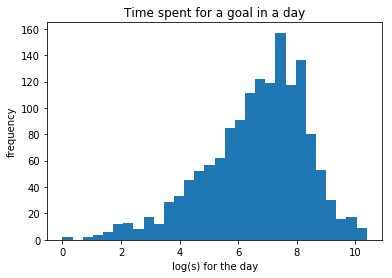

In [25]:
import matplotlib.pyplot as pyplot
import math
counter += 1
pyplot.figure(counter)
print("both freq " + str(len([(day['duration']) for day in day_spent_shared_domain_stats if day["device"] == ANDROID and day["frequent"] == "freq" and day["other_device_freq"] == "freq"])))
print("android freq/brwoser infreq"  + str(len([(day['duration']) for day in day_spent_shared_domain_stats if day["device"] == ANDROID and day["frequent"] == "freq" and day["other_device_freq"] == "infreq"])))
print("android infreq/browser freq" + str(len([(day['duration']) for day in day_spent_shared_domain_stats if day["device"] == ANDROID and day["frequent"] == "infreq" and day["other_device_freq"] == "freq"])))
print("both infreq " + str(len([(day['duration']) for day in day_spent_shared_domain_stats if day["frequent"] == "freq" and day["other_device_freq"] == "freq"])))
durations = [(day['duration']) for day in day_spent_shared_domain_stats if day["device"]  == ANDROID]
pyplot.xlabel("log(s) for the day")
pyplot.ylabel("frequency")
pyplot.title("Time spent for a goal in a day")
pyplot.hist(durations, bins=30)
import statistics
print(statistics.mean(durations))

In [26]:
%%R -i df -w 5 -h 5 --units in -r 200

df$frequent <- factor(df$frequent, levels=c("infreq", "freq"), ordered=FALSE)
df$device <- factor(df$device, levels=c("browser", "android"), ordered=FALSE)
df$other_device_freq <- factor(df$other_device_freq, levels=c("infreq", "freq"), ordered=FALSE)
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
summary(df)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


     goal               device       frequent  
 Length:1805        browser: 531   infreq:872  
 Class :character   android:1274   freq  :933  
 Mode  :character                              
                                               
                                               
                                               
                                               
                                                            email_hash  
 de0dd7052a011dc3bcc707915f634f83f12ad8bea77c3c22fa4a93e60ca8cc27: 105  
 dca7176c2160640b98afdf855ad996744f5068d038e29ffbae20e8121cca915e: 103  
 63270a88cf70700dec1d014ba4096e62c19a92084b7180cb228e6b65c875c6d3: 101  
 f8049cd0adc935da07707b58babb231c7b6e0463626e4ad7b1d1537367dff3a2:  94  
 65c46cb63840a6c611051d27c6aa52a17421c0189140c95f41021c3bfab0bf28:  76  
 b5843eadda18a08ec20d16d92370cc304849efac4f201d820399339f6683a64c:  75  
 (Other)                                                         :1251  
 other_device_freq    duration  

In [61]:
%%R -i df -w 5 -h 5 --units in -r 200


# SIGNIFCANT: does the frequency have an effect on duration, controlling for user and goal?
df$frequent <- factor(df$frequent, levels=c("infreq", "freq"), ordered=FALSE)
# df$device <- factor(df$device, levels=c("browser", "android"), ordered=FALSE)
df$other_device_freq <- factor(df$other_device_freq, levels=c("infreq", "freq"), ordered=FALSE)
df$email_hash <- factor(df$email_hash,  ordered=FALSE)

results <- lmer(duration ~ (other_device_freq) + (1|frequent)  + (1|email_hash) + (1|goal) + (1|day) , data = df)

resultsnull <- lmer(duration ~  (1|email_hash) + (1|goal), data = df)

#results <- lmer(duration ~ (1|other_device_freq) + (1|frequent) + (1|email_hash) + (1|goal) + (1|day) + (1|device), data = df)

# results <- lmer(duration ~ other_device_freq*device + (1|frequent) + (1|email_hash), data = df)

show(results)
# sjp.lmer(results)
show(ranef(results))
show(fixef(results))
summary(results)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


Linear mixed model fit by REML ['lmerModLmerTest']
Formula: duration ~ (other_device_freq) + (1 | frequent) + (1 | email_hash) +  
    (1 | goal) + (1 | day)
   Data: df
REML criterion at convergence: 4628.504
Random effects:
 Groups     Name        Std.Dev.
 email_hash (Intercept) 0.9007  
 day        (Intercept) 0.0000  
 goal       (Intercept) 0.9916  
 frequent   (Intercept) 0.1707  
 Residual               1.3971  
Number of obs: 1274, groups:  email_hash, 68; day, 36; goal, 16; frequent, 2
Fixed Effects:
          (Intercept)  other_device_freqfreq  
              6.05225               -0.03314  
$email_hash
                                                                  (Intercept)
06a2c3297825143fa91bf833964ec6119bccb3ccf7a049e19e51745450b40ef5 -1.232929260
0b499f07b93ec4b3e4958f91406e3bae276f33ef9db024a6d664438a5dee38eb -0.501665851
18d766e7790cdce76a31ba18acba779a6d24d95c2e384e1932305a701e257af5 -0.319477175
1f14decd5fa9c113d7c67eb52989192547f1c102d0a846455e5ea6ee311ad688 -

In [28]:
print(str(field_stats))

{'browser': {'freq': 270, 'infreq': 261}, 'android': {'infreq': 611, 'freq': 663}}


In [45]:
# Next, let's implement Michael's test.
# First, we need aggregate time spent across devices for a certain goal.
BROWSER_FREQ = "browser_freq"
ANDROID_FREQ = "android_freq"
agg_stat = {}
for item in day_spent_shared_domain_stats:
    if item["device"] == ANDROID:
        continue
    email = item["email_hash"]
    if email not in agg_stat:
        agg_stat[email] = {}
    date = item["day"]
    goal = item["goal"]
    if goal not in agg_stat[email]:
        agg_stat[email][goal] = {}
    if date not in agg_stat[email][goal]:
        agg_stat[email][goal][date] = {ANDROID: {}, BROWSER: {}}
    device = item["device"]
    if BROWSER_FREQ not in agg_stat[email][goal][date][device]:
        print(device)
        if item["device"] == BROWSER:
            agg_stat[email][goal][date][device][BROWSER_FREQ] = item["frequent"]
            agg_stat[email][goal][date][device][ANDROID_FREQ] = item["other_device_freq"]
        else:
            agg_stat[email][goal][date][device][BROWSER_FREQ] = item["other_device_freq"]
            agg_stat[email][goal][date][device][ANDROID_FREQ] = item["frequent"]
    else:
        print(item)
    if "duration" not in agg_stat[email][goal][date][device]:
        agg_stat[email][goal][date][device]["duration"] = item["duration"]
    else:
        agg_stat[email][goal][date][device]["duration"] += item["duration"]

browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser
browser


In [46]:
agg_stat_list = []
for email in agg_stat:
    for goal in agg_stat[email]:        
        for date in agg_stat[email][goal]:
            for device in agg_stat[email][goal][date]:
                obj = agg_stat[email][goal][date][device]
                if "duration" in obj:
                    agg_stat_list.append({"duration": obj["duration"], BROWSER_FREQ: obj[BROWSER_FREQ], ANDROID_FREQ: obj[ANDROID_FREQ],
                                         "email_hash": email, "goal": goal, "device": device})

In [47]:
print(set([item["goal"] for item in agg_stat_list]))

{'twitter', 'yahoo', 'facebook', 'reddit', 'nytimes', 'amazon', 'telegram', 'whatsapp', 'youtube', 'pinterest', 'instagram', 'linkedin', 'inbox', 'plurk', 'netflix'}


In [48]:
"""
Linear mixed model fit by REML ['lmerMod']
Formula: duration ~ other_device_freq + (1 | frequent) + (1 | email_hash) +  
    (1 | goal) + (1 | device)
   Data: df
REML criterion at convergence: 1219.07
Random effects:
 Groups     Name        Std.Dev.
 email_hash (Intercept) 1.1805  
 goal       (Intercept) 0.0000  
 device     (Intercept) 0.6750  
 frequent   (Intercept) 0.2812  
 Residual               1.5227  
Number of obs: 316, groups:  email_hash, 29; goal, 9; device, 2; frequent, 2
Fixed Effects:
            (Intercept)  other_device_freqinfreq  
                 5.1227                   0.7823  
Data: df
Models:
resultsnull: duration ~ (1 | frequent) + (1 | email_hash) + (1 | goal) + (1 | 
resultsnull:     device)
results: duration ~ other_device_freq + (1 | frequent) + (1 | email_hash) + 
results:     (1 | goal) + (1 | device)
            Df    AIC    BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)    
resultsnull  6 1241.6 1264.1 -614.78   1229.6                             
results      7 1232.4 1258.7 -609.21   1218.4 11.149      1  0.0008407 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
"""

"\nLinear mixed model fit by REML ['lmerMod']\nFormula: duration ~ other_device_freq + (1 | frequent) + (1 | email_hash) +  \n    (1 | goal) + (1 | device)\n   Data: df\nREML criterion at convergence: 1219.07\nRandom effects:\n Groups     Name        Std.Dev.\n email_hash (Intercept) 1.1805  \n goal       (Intercept) 0.0000  \n device     (Intercept) 0.6750  \n frequent   (Intercept) 0.2812  \n Residual               1.5227  \nNumber of obs: 316, groups:  email_hash, 29; goal, 9; device, 2; frequent, 2\nFixed Effects:\n            (Intercept)  other_device_freqinfreq  \n                 5.1227                   0.7823  \nData: df\nModels:\nresultsnull: duration ~ (1 | frequent) + (1 | email_hash) + (1 | goal) + (1 | \nresultsnull:     device)\nresults: duration ~ other_device_freq + (1 | frequent) + (1 | email_hash) + \nresults:     (1 | goal) + (1 | device)\n            Df    AIC    BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)    \nresultsnull  6 1241.6 1264.1 -614.78   1229.6       

In [49]:
data_frame_dict = { key: [] for key in agg_stat_list[0] }
for item in agg_stat_list:
    for key in item:
        data_frame_dict[key].append(item[key])

df = pd.DataFrame(data_frame_dict)


In [51]:
%%R -i df -w 5 -h 5 --units in -r 200

# SIGNIFCANT: does the frequency have an effect on duration, controlling for user and goal?

results <- lmer(duration ~ (android_freq) + (browser_freq) + (1|email_hash) + (1|goal) , data = df)

show(results)
summary(results)

Linear mixed model fit by REML ['lmerModLmerTest']
Formula: duration ~ (android_freq) + (browser_freq) + (1 | email_hash) +  
    (1 | goal)
   Data: df
REML criterion at convergence: 2281.825
Random effects:
 Groups     Name        Std.Dev.
 email_hash (Intercept) 1.0983  
 goal       (Intercept) 0.8211  
 Residual               1.2713  
Number of obs: 644, groups:  email_hash, 66; goal, 15
Fixed Effects:
       (Intercept)    android_freqfreq  android_freqinfreq    browser_freqfreq  
           5.65150            -0.19490            -0.54940            -0.01484  
browser_freqinfreq  
           0.14306  
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: duration ~ (android_freq) + (browser_freq) + (1 | email_hash) +  
    (1 | goal)
   Data: df

REML criterion at convergence: 2281.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.8844 -0.4384  0.1961  0.5965  2.6997 

Random effects:
 Groups     Name        Variance Std.Dev

In [28]:
"""
# Time on both

time ~ mobilecond desktopcond mobile * desktop
do two separate tests
"""


'\n# Time on both\n\ntime ~ mobilecond desktopcond mobile * desktop\ndo two separate tests\n'

In [29]:
# Now, let's see if the browser frequency settings affect Android usage
print(shared_data)

{'ce2998348d6b1204814e71969fb031253cbb828f2e04d4b42c7c9c33735255c2': {'shared': set()}, '2b4560fa696cfd842dc1cbcd24b12d1674b7cf267f4c1920971080ef87dc2311': {'shared': set(), 'lingodeer': {'android': {'packages': ['com.lingodeer'], 'com.lingodeer': {'34': 'freq'}}, 'browser': {'packages': []}}, 'talk': {'android': {'packages': ['com.google.android.talk'], 'com.google.android.talk': {'34': 'freq'}}, 'browser': {'packages': []}}, 'duolingo': {'android': {'packages': ['com.duolingo'], 'com.duolingo': {'34': 'infreq'}}, 'browser': {'packages': []}}, 'tencent': {'android': {'packages': ['com.tencent.mm'], 'com.tencent.mm': {'34': 'infreq'}}, 'browser': {'packages': []}}, 'lineageos': {'android': {'packages': ['org.lineageos.jelly'], 'org.lineageos.jelly': {'33': 'freq', '34': 'freq'}}, 'browser': {'packages': []}}, 'calendar': {'android': {'packages': ['com.android.calendar'], 'com.android.calendar': {'34': 'freq'}}, 'browser': {'packages': []}}, 'googlequicksearchbox': {'android': {'package

In [30]:

android_days = [] 
for account in accounts:
    if account["_id"] in shared_data:
        for user in account[ANDROID]:
            curr_date = ""
            day_data = {FREQ_TIME: 0, INFREQ_TIME: 0, TARGET_TIME: 0, NUM_BROWSER_GOALS: 0, BROWSER_INTENSITY: 0, INTENSITY: 0, INFREQ_GOALS: set([]),  TOTAL_TIME: 0, GOAL_TIME: 0, HASH: account["_id"], GOALS: set([]), FREQ_GOALS: set([]), OTHER_TIME: 0 }
            for s in db[user+ "_sessions"].find({"enabled": {"$exists": True}, "duration": {"$lt": 86400}}):
                time = moment.unix(s["timestamp"])
                date = time.format("YYYY-MM-DD")
                if date != curr_date:
                    if curr_date != "" and day_data[TOTAL_TIME] > 0 and len(day_data[GOALS]) > 0 and day_data[GOAL_TIME] > 0 and day_data[OTHER_TIME] > 0:
                        # Add obj and reset data
                        # take logs of time cuz time is log-norm distributed
                        for key in day_data:
                            if "time" in key and day_data[key] > 0:
                                day_data[key]= math.log(day_data[key])
                        # Now, goal is to get browser intensity
                        num_browser_goals = 0
                        num_freq_browser_goals = 0
                        isoWeek = str(datetime.fromtimestamp(s["timestamp"]/1000).isocalendar()[1]) 
                        for goal in shared_data[account["_id"]]:
                            if goal != "shared":
                                for package in shared_data[account["_id"]][goal][BROWSER][PACKAGES]:
                                    if isoWeek in shared_data[account["_id"]][goal][BROWSER][package]:
                                        if shared_data[account["_id"]][goal][BROWSER][package][isoWeek] != "both":
                                            num_browser_goals += 1
                                            if shared_data[account["_id"]][goal][BROWSER][package][isoWeek] == "freq":
                                                num_freq_browser_goals += 1
                        if num_browser_goals > 0:
                            day_data[BROWSER_INTENSITY] = num_freq_browser_goals/num_browser_goals
                            day_data[INTENSITY] = len(day_data[FREQ_GOALS])/len(day_data[GOALS])
                            day_data[NUM_BROWSER_GOALS] = num_browser_goals
                            android_days.append(day_data)
                        day_data = {FREQ_TIME: 0, INFREQ_TIME: 0, TARGET_TIME: 0, NUM_BROWSER_GOALS: 0, BROWSER_INTENSITY: 0, INTENSITY: 0, INFREQ_GOALS: set([]), TOTAL_TIME: 0, GOAL_TIME: 0, HASH: account["_id"], GOALS: set([]), FREQ_GOALS: set([]), OTHER_TIME: 0 }
                    curr_date = date
                if "enabled" in s:
                    if s["enabled"]:
                        day_data[GOALS].add(s["domain"])
                        if s["duration"] > 0:
                            if s["domain"] + "_domain_time" not in day_data:
                                day_data[s["domain"]+"_domain_time"] = 0
                            day_data[s["domain"]+"_domain_time"] += s["duration"]
                        if "frequent" in s and s["frequent"]:
                            day_data[FREQ_GOALS].add(s["domain"])
                            day_data[FREQ_TIME] += s["duration"]
                        elif "frequent" in s:
                            day_data[INFREQ_GOALS].add(s["domain"])
                            day_data[INFREQ_TIME] += s["duration"]
                        day_data[GOAL_TIME] += s["duration"]
                    elif "target" in s and s["target"]:
                        day_data[TARGET_TIME] += s["duration"]
                    else:
                        day_data[OTHER_TIME] += s["duration"]
                day_data[TOTAL_TIME] += (s["duration"])



In [31]:
intensity_dict = {INTENSITY: [], AVG_FREQ_TIME: [], AVG_INFREQ_TIME: [], NUM_BROWSER_GOALS: [], TARGET_TIME: [], BROWSER_INTENSITY: [], HASH: [], TOTAL_TIME: [], GOAL_TIME: [], OTHER_TIME: []}
for day in android_days:
    if len(day[FREQ_GOALS]) > 0 and len(day[INFREQ_GOALS]) > 0:
        for key in intensity_dict:
            if key == AVG_FREQ_TIME:
                intensity_dict[key].append(day[FREQ_TIME]/len(day[FREQ_GOALS]))
            elif key == AVG_INFREQ_TIME: 
                intensity_dict[key].append(day[INFREQ_TIME]/len(day[INFREQ_GOALS]))
            else:
                intensity_dict[key].append(day[key])
android_df = pd.DataFrame(intensity_dict)
android_df.to_csv("cross_device_android_df.csv")
print(android_df)

     intensity  avg_freq_time  avg_infreq_time  num_browser_goals  \
0     0.333333       6.452049         3.778214                  4   
1     0.666667       3.020127         4.094345                  4   
2     0.666667       3.477319         1.609438                  8   
3     0.636364       1.087970         1.869260                  8   
4     0.666667       2.108127         4.364213                  2   
5     0.500000       3.840088         3.884267                  2   
6     0.500000       2.490644         2.545584                  2   
7     0.500000       2.623643         2.812283                  2   
8     0.500000       1.968875         1.986654                  2   
9     0.571429       1.573817         2.534134                  2   
10    0.600000       2.286538         3.321243                  2   
11    0.600000       2.255013         4.110605                  2   
12    0.428571       2.595932         1.833582                  2   
13    0.428571       2.455271     

In [44]:
%%R -i android_df -w 5 -h 5 --units in -r 200
# Does non-goal time spent per day on phone inversely depend on goal-time?
android_df$email_hash <- factor(android_df$email_hash,  ordered=FALSE)
results <- lmer(total_time ~ browser_intensity  + (1|email_hash), data = android_df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: total_time ~ browser_intensity + (1 | email_hash)
   Data: android_df

REML criterion at convergence: 1792.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.7820 -0.4258  0.1819  0.5796  3.1259 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 0.6085   0.7801  
 Residual               0.4217   0.6494  
Number of obs: 808, groups:  email_hash, 80

Fixed effects:
                   Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)         9.59781    0.10515 107.40752  91.276   <2e-16 ***
browser_intensity   0.24128    0.09999 791.11210   2.413    0.016 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
brwsr_ntnst -0.458


In [32]:
%%R -i android_df -w 5 -h 5 --units in -r 200
# Does non-goal time spent per day on phone inversely depend on goal-time?
android_df$email_hash <- factor(android_df$email_hash,  ordered=FALSE)
results <- lmer(total_time ~ browser_intensity  + (1|email_hash), data = android_df)
summary(results)

/home/geza/.local/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: total_time ~ browser_intensity + (1 | email_hash)
   Data: android_df

REML criterion at convergence: 1792.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.7820 -0.4258  0.1819  0.5796  3.1259 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 0.6085   0.7801  
 Residual               0.4217   0.6494  
Number of obs: 808, groups:  email_hash, 80

Fixed effects:
                   Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)         9.59781    0.10515 107.40752  91.276   <2e-16 ***
browser_intensity   0.24128    0.09999 791.11210   2.413    0.016 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
brwsr_ntnst -0.458


In [46]:
%%R -i android_df -w 5 -h 5 --units in -r 200
# Does non-goal time spent per day on phone inversely depend on goal-time?
android_df$email_hash <- factor(android_df$email_hash,  ordered=FALSE)
results <- lmer(goal_time ~ browser_intensity + (1|email_hash), data = android_df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: goal_time ~ browser_intensity + (1 | email_hash)
   Data: android_df

REML criterion at convergence: 2201.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.2346 -0.4528  0.1178  0.5555  3.3794 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 0.6736   0.8207  
 Residual               0.7265   0.8523  
Number of obs: 808, groups:  email_hash, 80

Fixed effects:
                  Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)         8.3101     0.1191 117.8240  69.774   <2e-16 ***
browser_intensity  -0.1679     0.1295 804.0399  -1.297    0.195    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
brwsr_ntnst -0.526


In [34]:
%%R -i android_df -w 5 -h 5 --units in -r 200
# Does non-goal time spent per day on phone inversely depend on goal-time?
android_df$email_hash <- factor(android_df$email_hash,  ordered=FALSE)
results <- lmer(target_time ~ browser_intensity + (1|email_hash), data = android_df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: target_time ~ browser_intensity + (1 | email_hash)
   Data: android_df

REML criterion at convergence: 3270.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.7847 -0.2290 -0.0675  0.0237  3.7345 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 2.973    1.724   
 Residual               2.699    1.643   
Number of obs: 808, groups:  email_hash, 80

Fixed effects:
                  Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)         0.8626     0.2426 134.8877   3.555 0.000521 ***
browser_intensity   0.3398     0.2510 801.0471   1.353 0.176311    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
brwsr_ntnst -0.500


In [35]:

# Now let's see if Android frequency affects browser

browser_days = []
for account_obj in accounts:
    account = account_obj["_id"]
    if account in shared_data:
        for user in account_obj[BROWSER]:

            browser_day_map = {}
            for day_stat in ext_db[user+ "_synced:seconds_on_domain_per_day"].find({"key2":{"$gt": 930}}):
                # The key1 serves as a day. However, if we are going to compare same day stuffs for android.
                # We need to instead build day string from moment
                day = epoch_to_date(int(day_stat['key2']))
                if day not in browser_day_map:
                    browser_day_map[day] = {}
                goal = get_name(day_stat['key'], BROWSER_DOMAIN)
                if goal:
                    if goal + "_domain_time" not in browser_day_map or day_stat["val"] > browser_day_map[goal + "_domain_time"]:
                        browser_day_map[day][goal + "_domain_time"] = day_stat["val"]
            for day in browser_day_map:
                day_data = {ANDROID_INTENSITY: 0, INTENSITY: 0, INFREQ_GOALS: set([]),  TOTAL_TIME: 0, GOAL_TIME: 0, HASH: account, GOALS: set([]), FREQ_GOALS: set([]), 
                            OTHER_TIME: 0, FREQ_TIME:0, INFREQ_TIME: 0}
                # weirdly enough, datetime timestamps are seconds, not ms.
                isoWeek = str(datetime.fromtimestamp(moment.date(day).epoch() + 8 * (60 ** 2)).isocalendar()[1])
                # Add obj and reset data
                # take logs of time cuz time is log-norm distributed
                # First, count up all domain_times into TOTAL, GOAL, and OTHER
                BROWSER_GOALS = set([])
                BROWSER_FREQ_GOALS = set([])
                num_android_goals = 0
                num_freq_android_goals = 0
                num_browser_goals = 0
                num_freq_browser_goals = 0
                print(account)
                for goal in shared_data[account]:
                    if goal != "shared":
                        for package in shared_data[account][goal][ANDROID][PACKAGES]:
                            if isoWeek in shared_data[account][goal][ANDROID][package]:
                                if shared_data[account][goal][ANDROID][package][isoWeek] != "both":
                                    num_android_goals += 1
                                    if shared_data[account][goal][ANDROID][package][isoWeek] == "freq":
                                        num_freq_android_goals += 1
                        for package in shared_data[account][goal][BROWSER][PACKAGES]:
                            if isoWeek in shared_data[account][goal][BROWSER][package] and shared_data[account][goal][BROWSER][package][isoWeek] != "both":
                                BROWSER_GOALS.add(goal)
                                num_browser_goals += 1
                                if shared_data[account][goal][BROWSER][package][isoWeek] == "freq":
                                    BROWSER_FREQ_GOALS.add(goal)
                                    num_freq_browser_goals += 1
                for key in browser_day_map[day]:
                    if "_domain_time" in key:
                        key_goal = key[:-len("_domain_time")]
                        day_data[TOTAL_TIME] += int(browser_day_map[day][key])
                        if key_goal in BROWSER_GOALS:
                            day_data[GOAL_TIME] += browser_day_map[day][key]
                for key in day_data:
                    if "time" in key and day_data[key] > 0:
                        day_data[key]= math.log(day_data[key])
                if num_browser_goals > 0 and num_freq_android_goals > 0:
                    day_data[INTENSITY] = num_freq_browser_goals/num_browser_goals
                    day_data[ANDROID_INTENSITY] = num_freq_android_goals/num_android_goals
                    day_data[FREQ_GOALS] = BROWSER_FREQ_GOALS
                    day_data[GOALS] = BROWSER_GOALS
                    browser_days.append(day_data)



ce2998348d6b1204814e71969fb031253cbb828f2e04d4b42c7c9c33735255c2
ce2998348d6b1204814e71969fb031253cbb828f2e04d4b42c7c9c33735255c2
ce2998348d6b1204814e71969fb031253cbb828f2e04d4b42c7c9c33735255c2
ce2998348d6b1204814e71969fb031253cbb828f2e04d4b42c7c9c33735255c2
ce2998348d6b1204814e71969fb031253cbb828f2e04d4b42c7c9c33735255c2
ce2998348d6b1204814e71969fb031253cbb828f2e04d4b42c7c9c33735255c2
ce2998348d6b1204814e71969fb031253cbb828f2e04d4b42c7c9c33735255c2
ce2998348d6b1204814e71969fb031253cbb828f2e04d4b42c7c9c33735255c2
ce2998348d6b1204814e71969fb031253cbb828f2e04d4b42c7c9c33735255c2
ce2998348d6b1204814e71969fb031253cbb828f2e04d4b42c7c9c33735255c2
ce2998348d6b1204814e71969fb031253cbb828f2e04d4b42c7c9c33735255c2
ce2998348d6b1204814e71969fb031253cbb828f2e04d4b42c7c9c33735255c2
ce2998348d6b1204814e71969fb031253cbb828f2e04d4b42c7c9c33735255c2
ce2998348d6b1204814e71969fb031253cbb828f2e04d4b42c7c9c33735255c2
ce2998348d6b1204814e71969fb031253cbb828f2e04d4b42c7c9c33735255c2
ce2998348d6b1204814e71969

8b236f84f8b6e9b2fbf33bf242b7d7b6714c1d65dacbd2b7921b5672b10dbac6
8b236f84f8b6e9b2fbf33bf242b7d7b6714c1d65dacbd2b7921b5672b10dbac6
8b236f84f8b6e9b2fbf33bf242b7d7b6714c1d65dacbd2b7921b5672b10dbac6
8b236f84f8b6e9b2fbf33bf242b7d7b6714c1d65dacbd2b7921b5672b10dbac6
8b236f84f8b6e9b2fbf33bf242b7d7b6714c1d65dacbd2b7921b5672b10dbac6
8b236f84f8b6e9b2fbf33bf242b7d7b6714c1d65dacbd2b7921b5672b10dbac6
8b236f84f8b6e9b2fbf33bf242b7d7b6714c1d65dacbd2b7921b5672b10dbac6
8b236f84f8b6e9b2fbf33bf242b7d7b6714c1d65dacbd2b7921b5672b10dbac6
8b236f84f8b6e9b2fbf33bf242b7d7b6714c1d65dacbd2b7921b5672b10dbac6
8b236f84f8b6e9b2fbf33bf242b7d7b6714c1d65dacbd2b7921b5672b10dbac6
8b236f84f8b6e9b2fbf33bf242b7d7b6714c1d65dacbd2b7921b5672b10dbac6
8b236f84f8b6e9b2fbf33bf242b7d7b6714c1d65dacbd2b7921b5672b10dbac6
8b236f84f8b6e9b2fbf33bf242b7d7b6714c1d65dacbd2b7921b5672b10dbac6
8b236f84f8b6e9b2fbf33bf242b7d7b6714c1d65dacbd2b7921b5672b10dbac6
8b236f84f8b6e9b2fbf33bf242b7d7b6714c1d65dacbd2b7921b5672b10dbac6
8b236f84f8b6e9b2fbf33bf24

c8f9d9faffb0795bae5202216a8b0c06462fd91f92dd9e1a5e099e785243fcf2
7effa91eff9d9d1b4f5e7c32704c5bac1553c30c8bc1b1fd80b8edc302a44a88
7effa91eff9d9d1b4f5e7c32704c5bac1553c30c8bc1b1fd80b8edc302a44a88
7effa91eff9d9d1b4f5e7c32704c5bac1553c30c8bc1b1fd80b8edc302a44a88
7effa91eff9d9d1b4f5e7c32704c5bac1553c30c8bc1b1fd80b8edc302a44a88
7effa91eff9d9d1b4f5e7c32704c5bac1553c30c8bc1b1fd80b8edc302a44a88
7effa91eff9d9d1b4f5e7c32704c5bac1553c30c8bc1b1fd80b8edc302a44a88
7effa91eff9d9d1b4f5e7c32704c5bac1553c30c8bc1b1fd80b8edc302a44a88
7effa91eff9d9d1b4f5e7c32704c5bac1553c30c8bc1b1fd80b8edc302a44a88
7effa91eff9d9d1b4f5e7c32704c5bac1553c30c8bc1b1fd80b8edc302a44a88
7effa91eff9d9d1b4f5e7c32704c5bac1553c30c8bc1b1fd80b8edc302a44a88
7effa91eff9d9d1b4f5e7c32704c5bac1553c30c8bc1b1fd80b8edc302a44a88
7effa91eff9d9d1b4f5e7c32704c5bac1553c30c8bc1b1fd80b8edc302a44a88
7effa91eff9d9d1b4f5e7c32704c5bac1553c30c8bc1b1fd80b8edc302a44a88
7effa91eff9d9d1b4f5e7c32704c5bac1553c30c8bc1b1fd80b8edc302a44a88
7effa91eff9d9d1b4f5e7c327

b1f987e748865b62770b324af13a2bd459841857d33764cb049402174051f486
b1f987e748865b62770b324af13a2bd459841857d33764cb049402174051f486
b1f987e748865b62770b324af13a2bd459841857d33764cb049402174051f486
b1f987e748865b62770b324af13a2bd459841857d33764cb049402174051f486
b1f987e748865b62770b324af13a2bd459841857d33764cb049402174051f486
b1f987e748865b62770b324af13a2bd459841857d33764cb049402174051f486
b1f987e748865b62770b324af13a2bd459841857d33764cb049402174051f486
b1f987e748865b62770b324af13a2bd459841857d33764cb049402174051f486
b1f987e748865b62770b324af13a2bd459841857d33764cb049402174051f486
b1f987e748865b62770b324af13a2bd459841857d33764cb049402174051f486
b1f987e748865b62770b324af13a2bd459841857d33764cb049402174051f486
b1f987e748865b62770b324af13a2bd459841857d33764cb049402174051f486
b1f987e748865b62770b324af13a2bd459841857d33764cb049402174051f486
b1f987e748865b62770b324af13a2bd459841857d33764cb049402174051f486
b1f987e748865b62770b324af13a2bd459841857d33764cb049402174051f486
b1f987e748865b62770b324af

4bfe0fbe3bcf01e98d957a6571adb056a7b3a541292c81bd9671e7b65c72e192
4bfe0fbe3bcf01e98d957a6571adb056a7b3a541292c81bd9671e7b65c72e192
4bfe0fbe3bcf01e98d957a6571adb056a7b3a541292c81bd9671e7b65c72e192
4bfe0fbe3bcf01e98d957a6571adb056a7b3a541292c81bd9671e7b65c72e192
4bfe0fbe3bcf01e98d957a6571adb056a7b3a541292c81bd9671e7b65c72e192
4bfe0fbe3bcf01e98d957a6571adb056a7b3a541292c81bd9671e7b65c72e192
4bfe0fbe3bcf01e98d957a6571adb056a7b3a541292c81bd9671e7b65c72e192
4bfe0fbe3bcf01e98d957a6571adb056a7b3a541292c81bd9671e7b65c72e192
4bfe0fbe3bcf01e98d957a6571adb056a7b3a541292c81bd9671e7b65c72e192
4bfe0fbe3bcf01e98d957a6571adb056a7b3a541292c81bd9671e7b65c72e192
4bfe0fbe3bcf01e98d957a6571adb056a7b3a541292c81bd9671e7b65c72e192
4bfe0fbe3bcf01e98d957a6571adb056a7b3a541292c81bd9671e7b65c72e192
4bfe0fbe3bcf01e98d957a6571adb056a7b3a541292c81bd9671e7b65c72e192
4bfe0fbe3bcf01e98d957a6571adb056a7b3a541292c81bd9671e7b65c72e192
4bfe0fbe3bcf01e98d957a6571adb056a7b3a541292c81bd9671e7b65c72e192
acf308107cc9ca11ac06360f2

7fafeff7e62af3e9607523e488760d70832acb568edea516b03178f0b0a5a310
7fafeff7e62af3e9607523e488760d70832acb568edea516b03178f0b0a5a310
7fafeff7e62af3e9607523e488760d70832acb568edea516b03178f0b0a5a310
7fafeff7e62af3e9607523e488760d70832acb568edea516b03178f0b0a5a310
7fafeff7e62af3e9607523e488760d70832acb568edea516b03178f0b0a5a310
7fafeff7e62af3e9607523e488760d70832acb568edea516b03178f0b0a5a310
7fafeff7e62af3e9607523e488760d70832acb568edea516b03178f0b0a5a310
7fafeff7e62af3e9607523e488760d70832acb568edea516b03178f0b0a5a310
7fafeff7e62af3e9607523e488760d70832acb568edea516b03178f0b0a5a310
7fafeff7e62af3e9607523e488760d70832acb568edea516b03178f0b0a5a310
7fafeff7e62af3e9607523e488760d70832acb568edea516b03178f0b0a5a310
fef3d10729f7d2a14acac218a13b26241c02a538445c51cc7a38b422ee040208
fef3d10729f7d2a14acac218a13b26241c02a538445c51cc7a38b422ee040208
fef3d10729f7d2a14acac218a13b26241c02a538445c51cc7a38b422ee040208
fef3d10729f7d2a14acac218a13b26241c02a538445c51cc7a38b422ee040208
fef3d10729f7d2a14acac218a

a654b7cfe3e92421e6a4da7add805e8c1cc0eb7f8759401a2862d89621bffd6b
a654b7cfe3e92421e6a4da7add805e8c1cc0eb7f8759401a2862d89621bffd6b
a654b7cfe3e92421e6a4da7add805e8c1cc0eb7f8759401a2862d89621bffd6b
a654b7cfe3e92421e6a4da7add805e8c1cc0eb7f8759401a2862d89621bffd6b
a654b7cfe3e92421e6a4da7add805e8c1cc0eb7f8759401a2862d89621bffd6b
a654b7cfe3e92421e6a4da7add805e8c1cc0eb7f8759401a2862d89621bffd6b
a654b7cfe3e92421e6a4da7add805e8c1cc0eb7f8759401a2862d89621bffd6b
a654b7cfe3e92421e6a4da7add805e8c1cc0eb7f8759401a2862d89621bffd6b
a654b7cfe3e92421e6a4da7add805e8c1cc0eb7f8759401a2862d89621bffd6b
a654b7cfe3e92421e6a4da7add805e8c1cc0eb7f8759401a2862d89621bffd6b
a654b7cfe3e92421e6a4da7add805e8c1cc0eb7f8759401a2862d89621bffd6b
a654b7cfe3e92421e6a4da7add805e8c1cc0eb7f8759401a2862d89621bffd6b
a654b7cfe3e92421e6a4da7add805e8c1cc0eb7f8759401a2862d89621bffd6b
a654b7cfe3e92421e6a4da7add805e8c1cc0eb7f8759401a2862d89621bffd6b
a654b7cfe3e92421e6a4da7add805e8c1cc0eb7f8759401a2862d89621bffd6b
a654b7cfe3e92421e6a4da7ad

ac2b376f868729b5c05cdce09bdf5dfa1f91b46d91853f8378d3fb803d92c93e
ac2b376f868729b5c05cdce09bdf5dfa1f91b46d91853f8378d3fb803d92c93e
ac2b376f868729b5c05cdce09bdf5dfa1f91b46d91853f8378d3fb803d92c93e
ac2b376f868729b5c05cdce09bdf5dfa1f91b46d91853f8378d3fb803d92c93e
ac2b376f868729b5c05cdce09bdf5dfa1f91b46d91853f8378d3fb803d92c93e
ac2b376f868729b5c05cdce09bdf5dfa1f91b46d91853f8378d3fb803d92c93e
ac2b376f868729b5c05cdce09bdf5dfa1f91b46d91853f8378d3fb803d92c93e
ac2b376f868729b5c05cdce09bdf5dfa1f91b46d91853f8378d3fb803d92c93e
ac2b376f868729b5c05cdce09bdf5dfa1f91b46d91853f8378d3fb803d92c93e
ac2b376f868729b5c05cdce09bdf5dfa1f91b46d91853f8378d3fb803d92c93e
ac2b376f868729b5c05cdce09bdf5dfa1f91b46d91853f8378d3fb803d92c93e
ac2b376f868729b5c05cdce09bdf5dfa1f91b46d91853f8378d3fb803d92c93e
ac2b376f868729b5c05cdce09bdf5dfa1f91b46d91853f8378d3fb803d92c93e
ac2b376f868729b5c05cdce09bdf5dfa1f91b46d91853f8378d3fb803d92c93e
ac2b376f868729b5c05cdce09bdf5dfa1f91b46d91853f8378d3fb803d92c93e
ac2b376f868729b5c05cdce09

a831d0dd487eee54f5dd90d8b05a06aa46b487cbc91aa72b3fed08a99d94abc5
a831d0dd487eee54f5dd90d8b05a06aa46b487cbc91aa72b3fed08a99d94abc5
a831d0dd487eee54f5dd90d8b05a06aa46b487cbc91aa72b3fed08a99d94abc5
a831d0dd487eee54f5dd90d8b05a06aa46b487cbc91aa72b3fed08a99d94abc5
a831d0dd487eee54f5dd90d8b05a06aa46b487cbc91aa72b3fed08a99d94abc5
a831d0dd487eee54f5dd90d8b05a06aa46b487cbc91aa72b3fed08a99d94abc5
a831d0dd487eee54f5dd90d8b05a06aa46b487cbc91aa72b3fed08a99d94abc5
a831d0dd487eee54f5dd90d8b05a06aa46b487cbc91aa72b3fed08a99d94abc5
a831d0dd487eee54f5dd90d8b05a06aa46b487cbc91aa72b3fed08a99d94abc5
a831d0dd487eee54f5dd90d8b05a06aa46b487cbc91aa72b3fed08a99d94abc5
a831d0dd487eee54f5dd90d8b05a06aa46b487cbc91aa72b3fed08a99d94abc5
a831d0dd487eee54f5dd90d8b05a06aa46b487cbc91aa72b3fed08a99d94abc5
a831d0dd487eee54f5dd90d8b05a06aa46b487cbc91aa72b3fed08a99d94abc5
a831d0dd487eee54f5dd90d8b05a06aa46b487cbc91aa72b3fed08a99d94abc5
a831d0dd487eee54f5dd90d8b05a06aa46b487cbc91aa72b3fed08a99d94abc5
a831d0dd487eee54f5dd90d8b

d0e5a7cae63c11d6ed2bddf976c1b369f1b2f13e07117ba4ac457a52959654d2
d0e5a7cae63c11d6ed2bddf976c1b369f1b2f13e07117ba4ac457a52959654d2
d0e5a7cae63c11d6ed2bddf976c1b369f1b2f13e07117ba4ac457a52959654d2
d0e5a7cae63c11d6ed2bddf976c1b369f1b2f13e07117ba4ac457a52959654d2
d0e5a7cae63c11d6ed2bddf976c1b369f1b2f13e07117ba4ac457a52959654d2
fe50ec2aa4f26793671c4e770b773d26bc8aedb7db971522c0a9997b42cd194b
fe50ec2aa4f26793671c4e770b773d26bc8aedb7db971522c0a9997b42cd194b
fe50ec2aa4f26793671c4e770b773d26bc8aedb7db971522c0a9997b42cd194b
fe50ec2aa4f26793671c4e770b773d26bc8aedb7db971522c0a9997b42cd194b
fe50ec2aa4f26793671c4e770b773d26bc8aedb7db971522c0a9997b42cd194b
fe50ec2aa4f26793671c4e770b773d26bc8aedb7db971522c0a9997b42cd194b
fe50ec2aa4f26793671c4e770b773d26bc8aedb7db971522c0a9997b42cd194b
fe50ec2aa4f26793671c4e770b773d26bc8aedb7db971522c0a9997b42cd194b
fe50ec2aa4f26793671c4e770b773d26bc8aedb7db971522c0a9997b42cd194b
fe50ec2aa4f26793671c4e770b773d26bc8aedb7db971522c0a9997b42cd194b
fe50ec2aa4f26793671c4e770

6a57291c6d142b302996c7df49b399bd5fa10644b649d6a74a712881318c30bb
6a57291c6d142b302996c7df49b399bd5fa10644b649d6a74a712881318c30bb
6a57291c6d142b302996c7df49b399bd5fa10644b649d6a74a712881318c30bb
6a57291c6d142b302996c7df49b399bd5fa10644b649d6a74a712881318c30bb
6a57291c6d142b302996c7df49b399bd5fa10644b649d6a74a712881318c30bb
6a57291c6d142b302996c7df49b399bd5fa10644b649d6a74a712881318c30bb
6a57291c6d142b302996c7df49b399bd5fa10644b649d6a74a712881318c30bb
6a57291c6d142b302996c7df49b399bd5fa10644b649d6a74a712881318c30bb
6a57291c6d142b302996c7df49b399bd5fa10644b649d6a74a712881318c30bb
6a57291c6d142b302996c7df49b399bd5fa10644b649d6a74a712881318c30bb
6a57291c6d142b302996c7df49b399bd5fa10644b649d6a74a712881318c30bb
6a57291c6d142b302996c7df49b399bd5fa10644b649d6a74a712881318c30bb
6a57291c6d142b302996c7df49b399bd5fa10644b649d6a74a712881318c30bb
f8049cd0adc935da07707b58babb231c7b6e0463626e4ad7b1d1537367dff3a2
f8049cd0adc935da07707b58babb231c7b6e0463626e4ad7b1d1537367dff3a2
f8049cd0adc935da07707b58b

63bb029dea7cf5cd7789a4bf25436f487dc07ac146a53b4983e34377b3af1ca3
63bb029dea7cf5cd7789a4bf25436f487dc07ac146a53b4983e34377b3af1ca3
63bb029dea7cf5cd7789a4bf25436f487dc07ac146a53b4983e34377b3af1ca3
63bb029dea7cf5cd7789a4bf25436f487dc07ac146a53b4983e34377b3af1ca3
63bb029dea7cf5cd7789a4bf25436f487dc07ac146a53b4983e34377b3af1ca3
63bb029dea7cf5cd7789a4bf25436f487dc07ac146a53b4983e34377b3af1ca3
63bb029dea7cf5cd7789a4bf25436f487dc07ac146a53b4983e34377b3af1ca3
63bb029dea7cf5cd7789a4bf25436f487dc07ac146a53b4983e34377b3af1ca3
63bb029dea7cf5cd7789a4bf25436f487dc07ac146a53b4983e34377b3af1ca3
63bb029dea7cf5cd7789a4bf25436f487dc07ac146a53b4983e34377b3af1ca3
63bb029dea7cf5cd7789a4bf25436f487dc07ac146a53b4983e34377b3af1ca3
63bb029dea7cf5cd7789a4bf25436f487dc07ac146a53b4983e34377b3af1ca3
63bb029dea7cf5cd7789a4bf25436f487dc07ac146a53b4983e34377b3af1ca3
63bb029dea7cf5cd7789a4bf25436f487dc07ac146a53b4983e34377b3af1ca3
63bb029dea7cf5cd7789a4bf25436f487dc07ac146a53b4983e34377b3af1ca3
63bb029dea7cf5cd7789a4bf2

63270a88cf70700dec1d014ba4096e62c19a92084b7180cb228e6b65c875c6d3
63270a88cf70700dec1d014ba4096e62c19a92084b7180cb228e6b65c875c6d3
63270a88cf70700dec1d014ba4096e62c19a92084b7180cb228e6b65c875c6d3
63270a88cf70700dec1d014ba4096e62c19a92084b7180cb228e6b65c875c6d3
63270a88cf70700dec1d014ba4096e62c19a92084b7180cb228e6b65c875c6d3
63270a88cf70700dec1d014ba4096e62c19a92084b7180cb228e6b65c875c6d3
63270a88cf70700dec1d014ba4096e62c19a92084b7180cb228e6b65c875c6d3
63270a88cf70700dec1d014ba4096e62c19a92084b7180cb228e6b65c875c6d3
63270a88cf70700dec1d014ba4096e62c19a92084b7180cb228e6b65c875c6d3
6868df000fd32192aabc4c73e3d1618864833b0b08ed93b85804906365b47e25
6868df000fd32192aabc4c73e3d1618864833b0b08ed93b85804906365b47e25
6868df000fd32192aabc4c73e3d1618864833b0b08ed93b85804906365b47e25
6868df000fd32192aabc4c73e3d1618864833b0b08ed93b85804906365b47e25
6868df000fd32192aabc4c73e3d1618864833b0b08ed93b85804906365b47e25
6868df000fd32192aabc4c73e3d1618864833b0b08ed93b85804906365b47e25
6868df000fd32192aabc4c73e

75f2124fa4d799e90799bcebe3e6c0131cff7626817e168ae35f07b9ef768548
75f2124fa4d799e90799bcebe3e6c0131cff7626817e168ae35f07b9ef768548
75f2124fa4d799e90799bcebe3e6c0131cff7626817e168ae35f07b9ef768548
75f2124fa4d799e90799bcebe3e6c0131cff7626817e168ae35f07b9ef768548
75f2124fa4d799e90799bcebe3e6c0131cff7626817e168ae35f07b9ef768548
75f2124fa4d799e90799bcebe3e6c0131cff7626817e168ae35f07b9ef768548
097cf06c82ff7fdd8f84593b6584b2f1511a3464b96dba4dc78c7f82fbafcb49
097cf06c82ff7fdd8f84593b6584b2f1511a3464b96dba4dc78c7f82fbafcb49
097cf06c82ff7fdd8f84593b6584b2f1511a3464b96dba4dc78c7f82fbafcb49
097cf06c82ff7fdd8f84593b6584b2f1511a3464b96dba4dc78c7f82fbafcb49
097cf06c82ff7fdd8f84593b6584b2f1511a3464b96dba4dc78c7f82fbafcb49
097cf06c82ff7fdd8f84593b6584b2f1511a3464b96dba4dc78c7f82fbafcb49
097cf06c82ff7fdd8f84593b6584b2f1511a3464b96dba4dc78c7f82fbafcb49
45d4d0c16796ec4efcbb19279852ca66cae15efd48ac31b71cbd88bbf7ddb1ca
45d4d0c16796ec4efcbb19279852ca66cae15efd48ac31b71cbd88bbf7ddb1ca
45d4d0c16796ec4efcbb19279

In [36]:
AVG_GOAL_TIME= "avg_goal_time"
intensity_dict ={ANDROID_INTENSITY: [], INTENSITY: [], HASH: [], TOTAL_TIME: [], GOAL_TIME: [], OTHER_TIME: [], AVG_GOAL_TIME: []}
for day in browser_days:
    for key in intensity_dict:
        if key != AVG_GOAL_TIME:
            intensity_dict[key].append(day[key])
    intensity_dict[AVG_GOAL_TIME].append(day[GOAL_TIME]/len(day[GOALS]))
browser_df = pd.DataFrame(intensity_dict)
print(browser_df)

     android_intensity  intensity  \
0             1.000000   0.666667   
1             1.000000   0.666667   
2             1.000000   0.666667   
3             1.000000   0.666667   
4             1.000000   0.666667   
5             1.000000   0.666667   
6             0.500000   0.333333   
7             0.500000   0.333333   
8             0.500000   0.333333   
9             0.500000   0.333333   
10            0.500000   0.333333   
11            0.500000   0.333333   
12            0.500000   0.333333   
13            0.500000   1.000000   
14            0.500000   1.000000   
15            0.500000   1.000000   
16            0.500000   1.000000   
17            0.500000   1.000000   
18            0.500000   1.000000   
19            0.500000   1.000000   
20            0.666667   0.375000   
21            0.666667   0.375000   
22            0.666667   0.375000   
23            0.666667   0.375000   
24            0.666667   0.375000   
25            0.666667   0.375000   
2

In [49]:
%%R -i browser_df -w 5 -h 5 --units in -r 200
# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lm(total_time ~ android_intensity, data = browser_df)
summary(results)


Call:
lm(formula = total_time ~ android_intensity, data = browser_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.5317 -0.4447  0.3037  0.8646  2.4719 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)         8.5558     0.1393  61.428   <2e-16 ***
android_intensity  -0.1446     0.2358  -0.613     0.54    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.315 on 661 degrees of freedom
Multiple R-squared:  0.0005683,	Adjusted R-squared:  -0.0009437 
F-statistic: 0.3759 on 1 and 661 DF,  p-value: 0.54



In [47]:
%%R -i browser_df -w 5 -h 5 --units in -r 200
# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lmer(total_time ~ android_intensity + (1|email_hash), data = browser_df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: total_time ~ android_intensity + (1 | email_hash)
   Data: browser_df

REML criterion at convergence: 2116.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.5828 -0.2949  0.2076  0.5265  2.4667 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 0.5772   0.7597  
 Residual               1.1805   1.0865  
Number of obs: 663, groups:  email_hash, 83

Fixed effects:
                  Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)         8.5007     0.1668 331.2519   50.98   <2e-16 ***
android_intensity  -0.1754     0.2506 644.5664   -0.70    0.484    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
andrd_ntnst -0.815


In [38]:
%%R -i browser_df -w 5 -h 5 --units in -r 200
# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lmer(goal_time ~ android_intensity + (1|email_hash), data = browser_df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: goal_time ~ android_intensity + (1 | email_hash)
   Data: browser_df

REML criterion at convergence: 2991.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.2287 -0.3302  0.2143  0.5684  2.0279 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 2.568    1.602   
 Residual               4.360    2.088   
Number of obs: 663, groups:  email_hash, 83

Fixed effects:
                  Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)         5.7902     0.3311 324.0802  17.487   <2e-16 ***
android_intensity   0.3584     0.4873 654.3004   0.735    0.462    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
andrd_ntnst -0.798


In [39]:
%%R -i browser_df -w 5 -h 5 --units in -r 200
# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lmer(other_time ~ intensity + (1|email_hash), data = browser_df)
summary(results)

/home/geza/.local/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Error in asMethod(object) : not a positive definite matrix

  warnings.warn(x, RRuntimeWarning)
/home/geza/.local/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 此外: 
  warnings.warn(x, RRuntimeWarning)
/home/geza/.local/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Warning message:

  warnings.warn(x, RRuntimeWarning)
/home/geza/.local/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: In vcov.merMod(model) :
  warnings.warn(x, RRuntimeWarning)
/home/geza/.local/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 
 
  warnings.warn(x, RRuntimeWarning)
/home/geza/.local/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  Computed variance-covariance matrix problem: not a positive definite matrix;
returning NA matrix

  warnings.warn(x, RRuntimeWarning)


Error in asMethod(object) : not a positive definite matrix


In [40]:
%%R -i browser_df -w 5 -h 5 --units in -r 200
# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lmer(avg_goal_time ~ intensity + (1|email_hash), data = browser_df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: avg_goal_time ~ intensity + (1 | email_hash)
   Data: browser_df

REML criterion at convergence: 2223.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.6327 -0.3031  0.0557  0.3938  4.2057 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 2.633    1.623   
 Residual               1.184    1.088   
Number of obs: 663, groups:  email_hash, 83

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)   1.9288     0.2091 126.7501   9.224 8.08e-16 ***
intensity     1.0011     0.1987 647.6532   5.039 6.08e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr)
intensity -0.464
